# DATA ANALYTICS PROJECT
### Title: Football(Soccer) Analytics

#### Reason for the need to  study football analytics
1. Enables teams to identify the strengths and weaknesses of their players and opponents and to develop strategies that can help them win games.

2. Enabels teams to optimise their player recuitment and development process by identifying players who are likely to perform well in their system.

3. Enables teams to make better decisions on which players to sign,how  much to pay them and when to sell them.

4. I love soccer and I think merging soccer and data analytics sounds fun and intriguing.

### Aim and Goals of this Football Analytics Project

#### Project Aim:
The primary aim of this project was to leverage machine learning techniques to gain deeper insights into three critical areas of football analytics: player performance, match outcome prediction, and the influence of betting odds on match results. 

#### Specific Goals:
1. **Player Performance Analysis:**
   - **Objective:** Utilize player attributes to predict and understand the factors influencing player ratings, distinguishing between goalkeepers and outfield players.
   - **Goal:** Provide data-driven insights for talent identification, player valuation, and performance assessment.

2. **Match Outcome Prediction:**
   - **Objective:** Develop predictive models to forecast the outcomes of football matches (home win, away win, or draw) using historical match data and team statistics.
   - **Goal:** Support strategic decision-making for teams and analysts, offering insights into likely match outcomes for planning and tactical adjustments.

3. **Betting Odds Analysis:**
   - **Objective:** Analyze the relationship between betting odds and actual match outcomes to determine the predictive power and potential biases within the betting markets.
   - **Goal:** Understand the dynamics of betting odds in football, assisting stakeholders in evaluating betting strategies and market trends.

### Project Intention:
- The intention behind this multifaceted approach was not only to advance the application of machine learning in sports analytics but also to provide comprehensive tools and methodologies that could benefit various stakeholders in the football industry, including clubs, coaches, analysts, and betting enthusiasts.

### Conclusion:
- By achieving these goals, the project aimed to underscore the value of data-driven approaches in enriching our understanding of the game, enhancing decision-making processes, and uncovering new perspectives in the realm of football analytics.


###  Information about Dataset
1. Data source - Kaggle.com
2. It is an Euroapean Soccer database.
3. This database has  7 tables.(countries,match,league,player attributes,player,team and team attributes )
4. These tables makes a total of  25,000+ matches, 11 countries, 10,000+ players, season 2008 to 2016, players and player attributes and so on. 

Disclaimer : I checked everything to ensure no typos but there might be some  mistakes in the sentences but I hope they do not change the acutal infomation. 


 ### Import Libraries

In [1]:
import numpy as np 
import sqlite3
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Define a function to load data from the database into a DataFrame
def load_data(conn, table_name):
    query = f"SELECT * FROM {table_name}"
    return pd.read_sql_query(query, conn)

# Dataset Setup
#Please download the dataset from the following link and place it in  the same directory as this notbeook
#[Download Dataset](https://drive.google.com/drive/folders/1KisY_sB0qR45gKr9RRZ8QnLMASir62pH?usp=drive_link)

# choose the appropriate path(comment out or edit this with the right directory)
db_file_path = '/Users/lizzy/Documents/Python_lessons/Data Analytics/Project_Work/database.sqlite'

# Establish a connection to the database
with sqlite3.connect(db_file_path) as conn:
    # Load the data into DataFrames using the function
    countries_df = load_data(conn, 'Country')
    matches = load_data(conn, 'Match')
    leagues_df = load_data(conn, 'League')
    teams_df = load_data(conn, 'Team')
    team_details_df = load_data(conn,'Team_Attributes')
    player_details_df = load_data(conn, 'Player_Attributes')
    players_df = load_data(conn, 'Player')


#countries_df.head()
#matches_df.head()
#leagues_df.head()
#teams_df.head()
#team_details_df.head()
#player_details_df.head()
#players_df.head()



### Missing values check

In [3]:
# Define a function to summarize missing values for a DataFrame
def missing_values_summary(df, df_name):
    print(f"Missing Values in {df_name}:")
    missing_values_count = df.isnull().sum()
    missing_values_count = missing_values_count[missing_values_count > 0]
    if missing_values_count.empty:
        print("No missing values found.\n")
    else:
        print(missing_values_count, "\n")

# Summarize missing values for each DataFrame
missing_values_summary(countries_df, 'Countries')
missing_values_summary(matches, 'Matches')
missing_values_summary(leagues_df, 'Leagues')
missing_values_summary(teams_df, 'Teams')
missing_values_summary(player_details_df, 'Player_Details')
missing_values_summary(players_df, 'Players')
missing_values_summary(team_details_df, 'Team_Details')




Missing Values in Countries:
No missing values found.

Missing Values in Matches:
home_player_X1     1821
home_player_X2     1821
home_player_X3     1832
home_player_X4     1832
home_player_X5     1832
                  ...  
GBD               11817
GBA               11817
BSH               11818
BSD               11818
BSA               11818
Length: 104, dtype: int64 

Missing Values in Leagues:
No missing values found.

Missing Values in Teams:
team_fifa_api_id    11
dtype: int64 

Missing Values in Player_Details:
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836


###  Analysis

1. General Exploratory Data Analysis on the dataframes
I would like to print some rows of the various dataframes and  make some analysis on the various dataframes either individually or some dataframes emerged

In [4]:
#print a few rows of the dataframe
countries_df.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [5]:
teams_df.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [6]:
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [7]:
team_details_df.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


##  1. How many teams does each country have?

The idea is  
1. To join the matches_df with countries_df on the country_id.
2. Join the matches_df with the teams_df on the home_team_api_id
3. Groupby country name and counting the distinct number of teams


In [8]:
# 'countries_df', 'matches_df', and 'teams_df' are already loaded as DataFrames 

# Merge the matches with the countries on 'country_id'
matches_countries = pd.merge(matches, countries_df, left_on='country_id', right_on='id', how='left')

# Merge the above result with the teams on 'home_team_api_id'
matches_countries_teams = pd.merge(matches_countries, teams_df, left_on='home_team_api_id', right_on='team_api_id', how='left')

# Group by the country name and count the distinct number of teams
team_counts = matches_countries_teams.groupby('name')['team_long_name'].nunique().reset_index()

# Rename the columns as per your SQL output
team_counts.columns = ['Country', 'No. of Teams']

# Display the DataFrame
team_counts


,Country,No. of Teams
0,Belgium,24
1,England,34
2,France,35
3,Germany,30
4,Italy,32
5,Netherlands,25
6,Poland,22
7,Portugal,29
8,Scotland,17
9,Spain,33


#### From the above we see that France has the most teams which is 35, followed by England and with Switzerland having the least teams.

### 2. Count of matches won, lost and drawn 

between the various clubs

In [9]:
# First, perform  LEFT JOINs
matches_with_countries = pd.merge(matches, countries_df, left_on='country_id', right_on='id', how='left', suffixes=('', '_country'))
matches_with_teams_countries = pd.merge(matches_with_countries, teams_df, left_on='home_team_api_id', right_on='team_api_id', how='left', suffixes=('', '_team'))

# Perform the counts as specified in the SQL query
# We create a new DataFrame grouped by the Country and Team and calculate the Wins, Losses, and Draws
match_results = matches_with_teams_countries.groupby(['name', 'team_long_name']).apply(
    lambda x: pd.Series({
        'Won': (x['home_team_goal'] > x['away_team_goal']).sum(),
        'Lost': (x['home_team_goal'] < x['away_team_goal']).sum(),
        'Draw': (x['home_team_goal'] == x['away_team_goal']).sum()
    })).reset_index()

# Sort the results by the number of wins descending
match_results_sorted = match_results.sort_values(by='Won', ascending=False)

# Add a new column for Row Number using the cumulative count
match_results_sorted['Row Number'] = range(1, len(match_results_sorted) + 1)

# Set the 'Row Number' column as the index
match_results_sorted.set_index('Row Number', inplace=True)

# Display the DataFrame
match_results_sorted


,name,team_long_name,Won,Lost,Draw
Row Number,,,,,
1,Spain,FC Barcelona,131,9,12
2,Spain,Real Madrid CF,129,12,11
3,Scotland,Celtic,120,9,23
4,England,Manchester United,116,20,16
5,England,Manchester City,113,21,18
...,...,...,...,...,...
292,France,AC Arles-Avignon,2,11,6
293,Germany,DSC Arminia Bielefeld,2,7,8
294,Spain,Córdoba CF,1,12,6


#### Analysis of Team Performance in Football Matches

- The data reveals a clear dominance by top teams like FC Barcelona and Real Madrid CF, with each securing over 120 wins and minimal losses, underscoring their superiority in their respective leagues.
- Teams like Celtic in Scotland and Manchester clubs in England also show strong performance, with high win counts, indicating their leading positions in their leagues.
- In contrast, teams such as AC Arles-Avignon, DSC Arminia Bielefeld, and SpVgg Greuther Fürth exhibit significantly fewer wins, reflecting challenges or lower competitive standings in their respective leagues.


###  3. What  is  proportion of home team wins vs away team wins vs draws

1. The above is done generally
2. Then done by leagues

In [10]:
# Print the leagues dataframes
leagues_df.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [11]:
## 'matches' DataFrame has the columns 'home_team_goal' and 'away_team_goal'
# We'll create a new column to store the result of each match
matches['result'] = 'Draw'  # Default value
matches.loc[matches['home_team_goal'] > matches['away_team_goal'], 'result'] = 'Home Win'
matches.loc[matches['home_team_goal'] < matches['away_team_goal'], 'result'] = 'Away Win'

# Now, count the number of each result type
result_counts = matches['result'].value_counts()

# Calculate the proportions
result_proportions = result_counts / result_counts.sum()

# Show the proportions
result_proportions


Home Win    0.458717
Away Win    0.287386
Draw        0.253897
Name: result, dtype: float64

### Analysis of Match Outcomes in the 'matches' DataFrame

- The distribution of match outcomes indicates a predominant occurrence of **Home Wins**, accounting for approximately **45.87%** of all matches. This suggests a notable home advantage in the dataset.
- **Away Wins** make up about **28.74%** of the matches, highlighting that while significant, victories for visiting teams are less common than home wins.
- **Draws** occur in around **25.39%** of matches, reflecting a substantial portion of games where teams share points.


In [12]:
# 'matches' DataFrame has 'home_team_goal', 'away_team_goal', and 'league_id'
# 'leagues' DataFrame has 'id' and 'name' columns, where 'name' is the name of the league
# Merge matches with leagues to get the league names
matches_with_leagues = matches.merge(leagues_df, left_on='league_id', right_on='id', how='left')

# Determine the outcome of each match
matches_with_leagues['result'] = np.nan
matches_with_leagues.loc[matches_with_leagues['home_team_goal'] > matches_with_leagues['away_team_goal'], 'result'] = 'Home Win'
matches_with_leagues.loc[matches_with_leagues['home_team_goal'] < matches_with_leagues['away_team_goal'], 'result'] = 'Away Win'
matches_with_leagues.loc[matches_with_leagues['home_team_goal'] == matches_with_leagues['away_team_goal'], 'result'] = 'Draw'

# Pivot to get counts of each result type by league name
league_results = matches_with_leagues.pivot_table(index='name', columns='result', values='league_id', aggfunc='size', fill_value=0)

# Calculate the total matches for normalization
league_results['Total Matches'] = league_results.sum(axis=1)

# Calculate proportions as a percentage
league_results['Home Win Proportion'] = (league_results['Home Win'] / league_results['Total Matches']) * 100
league_results['Away Win Proportion'] = (league_results['Away Win'] / league_results['Total Matches']) * 100
league_results['Draw Proportion'] = (league_results['Draw'] / league_results['Total Matches']) * 100

# Drop the 'Total Matches' column if you only want to display proportions
league_results.drop('Total Matches', axis=1, inplace=True)

# Display the league names and their match outcome proportions
#league_results



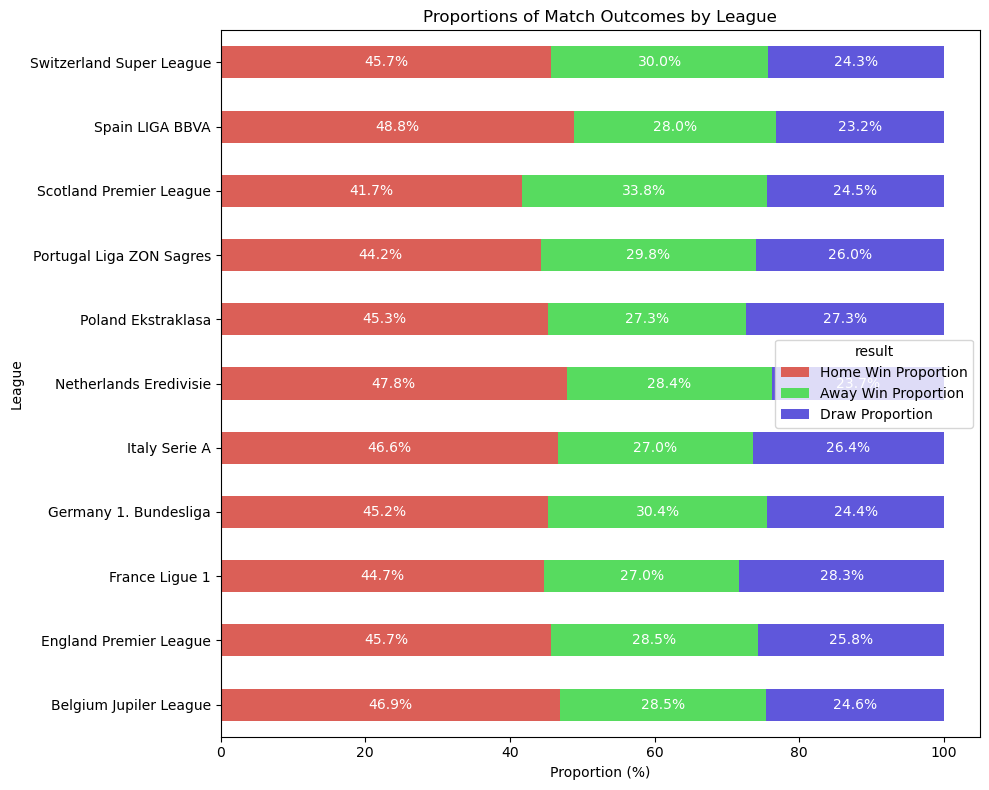

In [13]:
# Prepare data for plotting
league_proportions = league_results[['Home Win Proportion', 'Away Win Proportion', 'Draw Proportion']]

# Plotting with leagues on the y-axis
ax = league_proportions.plot(kind='barh', stacked=True, figsize=(10, 8), color=sns.color_palette("hls", 3))

# Set title and axis labels
ax.set_title('Proportions of Match Outcomes by League')
ax.set_xlabel('Proportion (%)')
ax.set_ylabel('League')

# Initialize a list to store the cumulative width of the bars
cumulative_widths = [0] * len(league_proportions)

# Annotate the bars with the percentage values
for i, (index, row) in enumerate(league_proportions.iterrows()):
    for j, value in enumerate(row):
        # Update the position for the text based on the cumulative width
        x_pos = cumulative_widths[i]

        if value > 0:  # Skip empty values to avoid clutter
            # Depending on the length of the bar, decide where to put the text
            if value > 5:  # If the bar is long enough, put the text inside
                text_color = 'white'
                ha = 'center'
                x_text = x_pos + value / 2
            else:  # If the bar is too short, put the text outside
                text_color = 'black'
                ha = 'left'
                x_text = x_pos + value

            # Place the text for the value
            ax.text(x_text, i, f'{value:.1f}%', va='center', ha=ha, color=text_color)

        # Update the cumulative width with the current value
        cumulative_widths[i] += value

# Tight layout for better spacing
plt.tight_layout()
plt.show()

### Summary of Match Outcomes Across Various Football Leagues

- The data shows significant variations in match outcomes across different leagues. For instance, Spain's LIGA BBVA and the Netherlands' Eredivisie exhibit high Home Win Proportions (48.85% and 47.83%, respectively), indicating a strong home-field advantage.
- In contrast, leagues like Scotland's Premier League and Germany's Bundesliga have a higher proportion of Away Wins (33.83% and 30.39%), suggesting more balanced or competitive away team performances.
- The France Ligue 1 stands out for its high Draw Proportion (28.26%), implying a greater frequency of evenly matched games compared to other leagues.


### 4. Top 20 players with high overall ratings

In [14]:
players_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [15]:
# If you just want to see if there are any duplicates at all:
has_duplicates = players_df.duplicated().any()
print(f"Are there any duplicates? {has_duplicates}")
#players_df.columns

Are there any duplicates? False


In [16]:
player_details_df.head()
#player_details_df.columns

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [17]:
# If you just want to see if there are any duplicates at all:
has_duplicates = player_details_df.duplicated().any()
print(f"Are there any duplicates? {has_duplicates}")

Are there any duplicates? False


In [18]:
# merge dataframes on a common index
#players_df and player_details_df are already loaded as  DataFrames
players_combined = pd.merge( players_df,player_details_df, on='player_api_id', how='inner')

#print a few rows
players_combined.head()


,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,2016-02-18 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,2015-11-19 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,2015-09-21 00:00:00,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,2015-03-20 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,2007-02-22 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [19]:
print(players_df.shape)
print(player_details_df.shape)
print(players_combined.shape)

(11060, 7)
(183978, 42)
(183978, 48)


Now with the needed information extracted, the above question can be answered

In [20]:
# Sort by overall_rating, drop duplicates to ensure each player appears only once
# and get the top 20 players with the highest overall rating
top20_overall_df = players_combined.sort_values('overall_rating', ascending=False).drop_duplicates(['player_api_id']).head(20)

# Print the results
print(top20_overall_df[['player_api_id', 'player_name', 'overall_rating']])


        player_api_id        player_name  overall_rating
102483          30981       Lionel Messi            94.0
33330           30893  Cristiano Ronaldo            93.0
63875           30717   Gianluigi Buffon            93.0
178975          30829       Wayne Rooney            93.0
66757           39989     Gregory Coupet            92.0
180723          39854     Xavi Hernandez            92.0
170037          30626      Thierry Henry            91.0
6531            30723   Alessandro Nesta            91.0
72609           30657      Iker Casillas            91.0
53197           34520    Fabio Cannavaro            91.0
153452          30743         Ronaldinho            91.0
12789           30955     Andres Iniesta            91.0
84874           30627         John Terry            91.0
144925          22543     Radamel Falcao            90.0
59279           30631      Frank Lampard            90.0
16464           30834       Arjen Robben            90.0
183486          38843         Z

### Analysis of Top Player Ratings 

- **Lionel Messi and Cristiano Ronaldo:** The data places Lionel Messi at the top with an overall rating of 94, closely followed by Cristiano Ronaldo at 93. This aligns with the general consensus in the football community, recognizing them as two of the greatest players of their generation, consistently delivering outstanding performances.

- **Gianluigi Buffon's Prominence:** Gianluigi Buffon, also rated at 93, stands out as a goalkeeper among the top-rated players. His inclusion at this level is reflective of his exceptional skills and contributions to the game during the peak of his career, especially in the period from 2008 to 2016. Known for his remarkable saves and leadership, Buffon's rating is a testament to his status as a world-class goalkeeper.

- **Other Notable Players:** The list also includes renowned names like Wayne Rooney, Xavi Hernandez, Thierry Henry, and Andres Iniesta, each with ratings above 90. These players have been pivotal in their respective teams, known for their skill, consistency, and impact on the field.

#### Concluding Thoughts:
- The overall ratings capture more than just the players' abilities; they reflect their influence, consistency, and performance at the highest levels of football. 
- The presence of players from various positions, including a goalkeeper among the top-rated, underscores the diverse skills and roles that contribute to the richness of the sport.
- This analysis not only highlights individual brilliance but also serves as a reminder of the memorable eras and styles these players represent in football history.


### 5. The   Distribution of players  by Attacking Rate(High, medium and low)
This analysis is quite important to know especially for forwards(strikers)

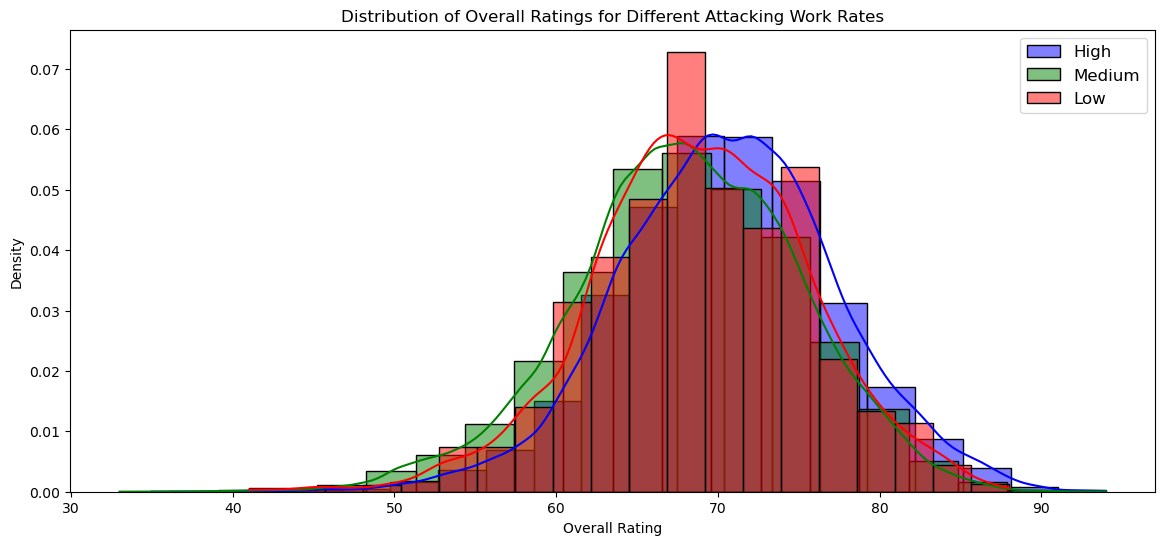

In [21]:
# Sort by 'attacking_work_rate' and 'overall_rating'
attacking_high = players_combined[players_combined['attacking_work_rate'] == 'high'].sort_values('overall_rating', ascending=False).drop_duplicates('player_api_id')
attacking_medium = players_combined[players_combined['attacking_work_rate'] == 'medium'].sort_values('overall_rating', ascending=False).drop_duplicates('player_api_id')
attacking_low = players_combined[players_combined['attacking_work_rate'] == 'low'].sort_values('overall_rating', ascending=False).drop_duplicates('player_api_id')

# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Plot a histogram for each category of attacking work rate for all players
sns.histplot(players_combined[players_combined['attacking_work_rate'] == 'high']['overall_rating'], color="blue", label='High', kde=True, bins=20, stat='density')
sns.histplot(players_combined[players_combined['attacking_work_rate'] == 'medium']['overall_rating'], color="green", label='Medium', kde=True, bins=20, stat='density')
sns.histplot(players_combined[players_combined['attacking_work_rate'] == 'low']['overall_rating'], color="red", label='Low', kde=True, bins=20, stat='density')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Distribution of Overall Ratings for Different Attacking Work Rates')
plt.xlabel('Overall Rating')
plt.ylabel('Density')
plt.show()


1. The distribution suggests that players with high attacking work rates tend to have higher overall ratings, as the peak of the blue curve is shifted towards the right.
2. This could indicate that players who are more active in attacking roles are generally rated higher, perhaps because they contribute more to scoring goals, which is a highly valued attribute.

### 6. Top 10 with the highest finishing rates

In [22]:
top10_finishing_df = players_combined.sort_values('finishing', ascending=False).drop_duplicates('player_api_id').head(10)

# Print the results
print(top10_finishing_df[['player_api_id', 'player_name', 'finishing']])


        player_api_id          player_name  finishing
102494          30981         Lionel Messi       97.0
134055          38567         Nikola Zigic       97.0
104175          30709            Luca Toni       96.0
170036          30626        Thierry Henry       95.0
97189           36784  Klaas Jan Huntelaar       95.0
33336           30893    Cristiano Ronaldo       95.0
55888           30853      Fernando Torres       95.0
155164          34602  Ruud van Nistelrooy       95.0
105578          34106         Luis Fabiano       94.0
40715           30909          David Villa       94.0


### Analysis of Top Finishing Ratings in Football

- **Elite Finishers:** The list is dominated by renowned strikers, exemplified by Lionel Messi and Nikola Zigic, both leading with a finishing rating of 97. This high rating is indicative of their exceptional ability to convert scoring opportunities, a key attribute for forwards.

- **Consistency Among Top Scorers:** Players like Luca Toni, Thierry Henry, and Cristiano Ronaldo, all with ratings close to 95, further highlight the consistency and prowess of top forwards in the game. Their finishing skills have been critical to their success and reputation as some of the best goal-scorers.

- **Role-Specific Ratings:** The trend of high finishing ratings among players known primarily for their attacking roles aligns with the expectations of their positions. Players such as Fernando Torres, Ruud van Nistelrooy, and David Villa, also featured in this list, are celebrated for their clinical finishing in front of the goal.

#### Concluding Observations:
- The data underscores the importance of finishing ability in defining the success of forward players. High finishing ratings are a clear indicator of a player's effectiveness in attacking roles and their contribution to their team's offensive strength.
- These ratings not only reflect individual skill but also the strategic importance of having reliable finishers in team composition, crucial for converting play into goals.
- The list serves as a reminder of some of the most prolific scorers in recent football history, bringing back memories of their remarkable careers and contributions to the sport.


### 7.  Distribution of  players by Defensive rate(high, medium and low)

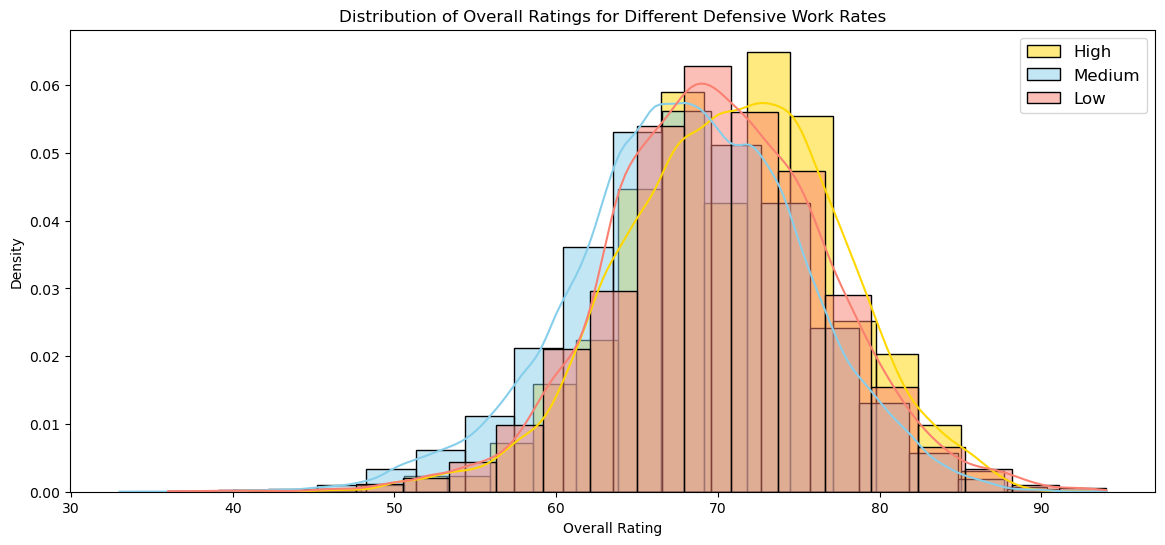

In [23]:
# Sort by 'attacking_work_rate' and 'overall_rating'
attacking_high = players_combined[players_combined['defensive_work_rate'] == 'high'].sort_values('overall_rating', ascending=False).drop_duplicates('player_api_id')
attacking_medium = players_combined[players_combined['defensive_work_rate'] == 'medium'].sort_values('overall_rating', ascending=False).drop_duplicates('player_api_id')
attacking_low = players_combined[players_combined['defensive_work_rate'] == 'low'].sort_values('overall_rating', ascending=False).drop_duplicates('player_api_id')
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Plot a histogram for each category of attacking work rate
sns.histplot(players_combined[players_combined['defensive_work_rate'] == 'high']['overall_rating'], color="gold", label='High', kde=True, bins=20,stat='density')
sns.histplot(players_combined[players_combined['defensive_work_rate'] == 'medium']['overall_rating'], color="skyblue", label='Medium', kde=True, bins=20,stat='density')
sns.histplot(players_combined[players_combined['defensive_work_rate'] == 'low']['overall_rating'], color="salmon", label='Low', kde=True, bins=20,stat='density')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Distribution of Overall Ratings for Different Defensive Work Rates')
plt.xlabel('Overall Rating')
plt.ylabel('Density')
plt.show()


1. It appears that players with medium defensive work rates have the highest peak, indicating that most players fall into this category.
2. There's not a clear trend showing that higher defensive work rates correlate with higher overall ratings, which might suggest that attacking attributes could be more influential in a player's overall rating, or that there's a balance in how defensive and offensive skills contribute to overall ratings.


### 8.  Top 10 with the lowest finishing rates¶

In [24]:
worst10_finishing_df = players_combined.sort_values('finishing', ascending=False).drop_duplicates('player_api_id').tail(10)

# Print the results
print(worst10_finishing_df[['player_api_id', 'player_name', 'finishing']])


        player_api_id         player_name  finishing
39591           42141      David Gonzalez        8.0
7966           248437  Alexander Schwolow        8.0
113880         148297         Mario Matos        8.0
153476          33546       Ronan Le Crom        8.0
89782          655544       Josip Posavec        6.0
139932         607121   Paul Andre Guerin        6.0
110658         277693    Marcelo Valverde        6.0
4501           698273        Alban Lafont        6.0
47120          258206     Dziugas Bartkus        6.0
125498         571298        Miguel Silva        5.0


### Analysis of Players with Lower Finishing Ratings

- The list primarily features players with relatively low finishing ratings, ranging from 5 to 8. Notably, these ratings are significantly lower than those typically seen among attacking players.

- A closer examination of the players, such as David Gonzalez, Alexander Schwolow, and Josip Posavec, suggests that they are likely goalkeepers. This inference is based on the traditionally low finishing ratings for goalkeepers, whose primary role and skill set are focused on defending the goal rather than scoring.

- Players like Marcelo Valverde, Alban Lafont, and Miguel Silva, also with finishing ratings within this range, reinforce the trend of goalkeepers receiving lower scores in finishing, consistent with their positional requirements and skill specialization.

#### Key Takeaway:
- The data reflects the positional nature of football, where different roles entail distinct skill sets. Goalkeepers, as exemplified by this list, typically have lower finishing ratings, aligning with their defensive responsibilities and limited involvement in goal-scoring actions.
- These ratings underscore the specialized skills and training of goalkeepers, emphasizing their critical role in preventing goals rather than scoring them.


###  9. Average goals scored per league

In [25]:
#  'matches' and 'leagues' DataFrames are already loaded

# Merge the matches with the leagues
matches_leagues = pd.merge(matches, leagues_df, left_on='league_id', right_on='id', how='left')

# Calculate the total goals for each match
matches_leagues['total_goals'] = matches_leagues['home_team_goal'] + matches_leagues['away_team_goal']

# Group by the league name and calculate the average goals
average_goals_per_league = matches_leagues.groupby('name')['total_goals'].mean().reset_index()

# Rename the columns for clarity
average_goals_per_league.columns = ['League', 'Average Goals per Match']

# Sort the results by average goals
average_goals_per_league = average_goals_per_league.sort_values(by='Average Goals per Match', ascending=False)

# Display the results
#average_goals_per_league


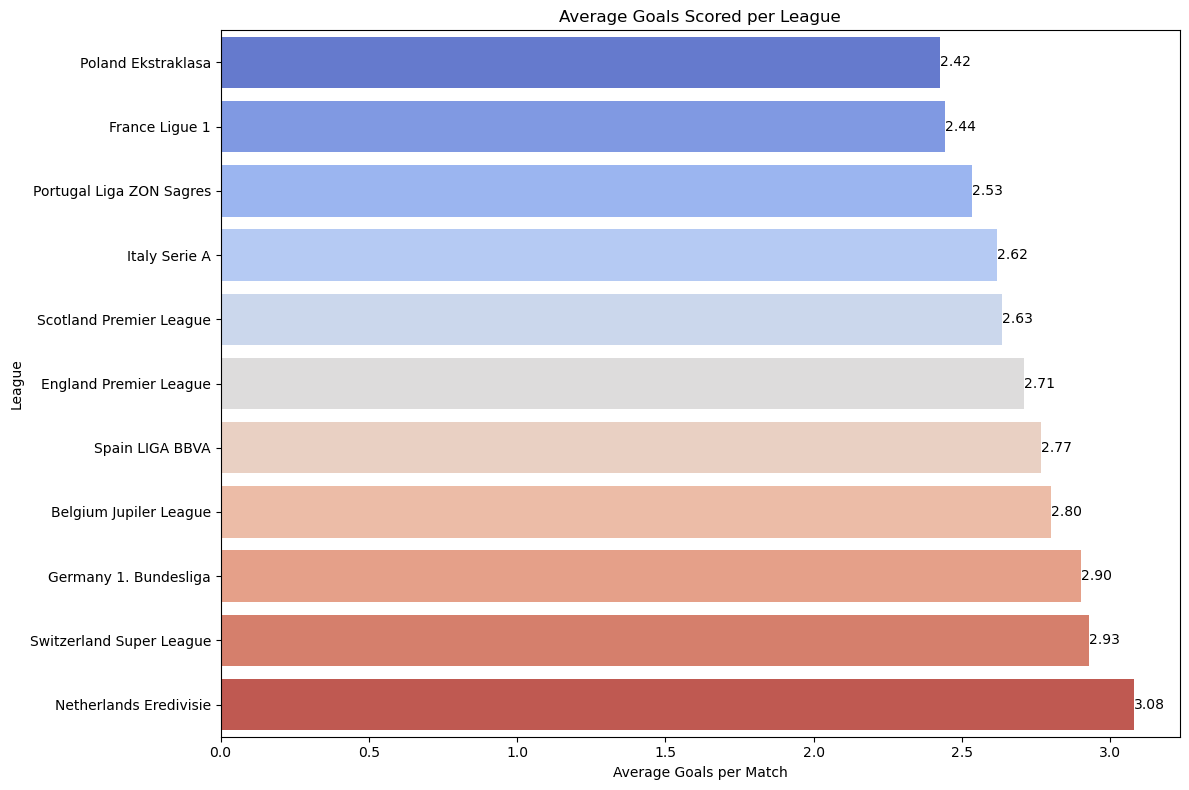

In [26]:
# Sort the average_goals_per_league for better visualization
average_goals_per_league = average_goals_per_league.sort_values('Average Goals per Match', ascending=True)

# Now let's create a horizontal bar plot for average goals per league
plt.figure(figsize=(12, 8))  # Set the figure size
bar_plot = sns.barplot(x='Average Goals per Match', y='League', data=average_goals_per_league, palette='coolwarm')

# Add labels and title
plt.xlabel('Average Goals per Match')
plt.ylabel('League')
plt.title('Average Goals Scored per League')

# Annotate each bar with the value
for bar in bar_plot.patches:
    plt.text(
        bar.get_width(),  # Get the horizontal end point of the bar
        bar.get_y() + bar.get_height() / 2,  # Get the vertical coordinate for the text
        f'{bar.get_width():.2f}',  # The text to be shown (and format)
        va='center'  # Vertical alignment
    )

# Display the plot
plt.tight_layout()
plt.show()


1. The Netherlands Eredivisie has the highest average at 3.08 goals per match, indicating it might be a more attacking-oriented league or that it has less stringent defenses compared to others.
2. In contrast, the Poland Ekstraklasa has the lowest average at 2.42 goals per match, which could point to stronger defensive play or less offensive prowes

In [27]:
# Assuming 'player_name' is the column that contains the names of the players
#print(players_df['player_name'])
# Print the first few entries in the 'player_name' column
#print(players_df['player_name'].head())
# Set the pandas option to display the maximum number of rows
#pd.set_option('display.max_rows', None)

# Now print the player names
#print(players_df['player_name'])
#pd.reset_option('display.max_rows')
#names_to_search = ['Muntari', 'Boateng', 'Kuffour']  # Example list of names
#pattern = '|'.join(names_to_search)  # Join names as a pattern for regex search

#players_with_names = players_df[players_df['player_name'].str.contains(pattern, case=False, na=False)]
#print(players_with_names)


### 10. I want to check the ratings of some Ghanaian players in Europe at each age
This is something I did to see how Ghanaian players were rated in Europe over these period.
I want to do this get an overview of what age it is likely for Ghanaian players to be at their peak in Europe.(personal analysis)

In [28]:
# list of player names
player_names = [
    'Andre Ayew',  'John Mensah', 'Kwadwo Asamoah',
    'Michael Essien', 'Asamoah Gyan', 'Stephen Appiah', 'Sulley Ali Muntari', 
]

# Filter the players_df DataFrame for the players of interest
players = players_df[players_df['player_name'].isin(player_names)]

# Join the 'players' DataFrame with 'player_details' on 'player_api_id'
# Ensure that 'player_details' and 'players_df' DataFrames have the 'player_api_id' column
ghana = pd.merge(players, player_details_df, on='player_api_id')

# Convert 'date' from 'player_details' and 'birthday' from 'players_df' to datetime
ghana['date'] = pd.to_datetime(ghana['date'])
ghana['birthday'] = pd.to_datetime(ghana['birthday'])

# Now calculate the age at the time of rating
ghana['age_at_rating'] = (ghana['date'] - ghana['birthday']).dt.days // 365

# Filter out players who were over 20 years old at the time of their rating
ghana = ghana[ghana['age_at_rating'] > 20]

# Display the head of the DataFrame to verify
ghana.head()



,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,age_at_rating
0,637,95955,Andre Ayew,176571,1989-12-17,175.26,159,10734,176571,2016-04-28,...,71.0,54.0,62.0,75.0,10.0,6.0,12.0,7.0,15.0,26
1,637,95955,Andre Ayew,176571,1989-12-17,175.26,159,10735,176571,2016-04-14,...,71.0,54.0,62.0,75.0,10.0,6.0,12.0,7.0,15.0,26
2,637,95955,Andre Ayew,176571,1989-12-17,175.26,159,10736,176571,2016-03-03,...,71.0,54.0,62.0,75.0,10.0,6.0,12.0,7.0,15.0,26
3,637,95955,Andre Ayew,176571,1989-12-17,175.26,159,10737,176571,2015-12-17,...,71.0,54.0,62.0,75.0,10.0,6.0,12.0,7.0,15.0,26
4,637,95955,Andre Ayew,176571,1989-12-17,175.26,159,10738,176571,2015-10-30,...,71.0,54.0,62.0,75.0,10.0,6.0,12.0,7.0,15.0,25


In [29]:
#calculate the average values by Age and Name
# Group by 'player_name' and 'age_at_rating', then calculate the mean of 'overall_rating'
ghana_rate = ghana[['player_name', 'age_at_rating', 'overall_rating']].groupby(['player_name', 'age_at_rating']).mean().reset_index()
ghana_rate.head()



,player_name,age_at_rating,overall_rating
0,Andre Ayew,21,78.500000
1,Andre Ayew,22,81.000000
2,Andre Ayew,23,80.500000
3,Andre Ayew,24,78.333333
4,Andre Ayew,25,78.800000


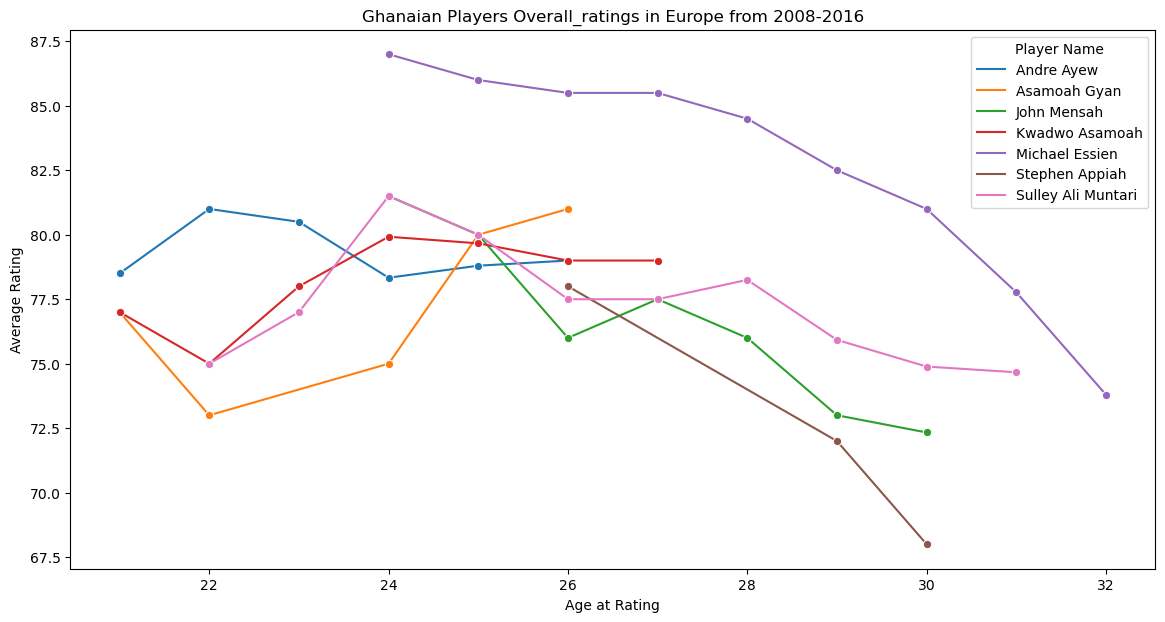

In [30]:
# Create the line plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=ghana_rate, x='age_at_rating', y='overall_rating', hue='player_name', marker='o')

# Add labels and a title to the plot
plt.xlabel('Age at Rating')
plt.ylabel('Average Rating')
plt.title('Ghanaian Players Overall_ratings in Europe from 2008-2016')
plt.legend(title='Player Name')

# Show the plot
plt.show()


## Analysis of Ghanaian Players' Overall Ratings in Europe (2008-2016)

The graph presents the trajectory of average ratings for various Ghanaian football players over their careers in Europe. Each line traces a player's average rating against their age, providing insight into their performance progression.

### Sulley Ali Muntari's Performance

Sulley Ali Muntari, indicated by the pink line, demonstrates a noteworthy trend:

- **Peak Performance**: Muntari's ratings improve as he approaches his late 20s, peaking around age 28.
- **Sustained Competence**: Even as he advances into his 30s, Muntari maintains a high rating close to 80, suggesting a commendable level of play during these years.
- **Decline Phase**: After 30, his ratings decline more sharply, a common trend as age impacts physical attributes.

### Overall Observations

- **Age Impact**: As expected, most players show a decline in ratings as they age, with peak performance typically occurring in the late 20s.
- **Muntari's Distinction**: Compared to peers, Muntari maintains above-average ratings for a more extended period, indicating his ability to adapt and perform despite the aging process.

### Concluding Thoughts

Sulley Ali Muntari's career trajectory shows that he was able to adapt and maintain a high level of performance well into his 30s, which is commendable in the competitive landscape of European football.


## Machine Learning Part of the the project
1. Supervised Learning(random forest, regression)

## 1. Player ratings Analysis

### Import machine learning Libraries

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, log_loss


Learn some features of goalkeeprs to see if they contribute to their overall ratings

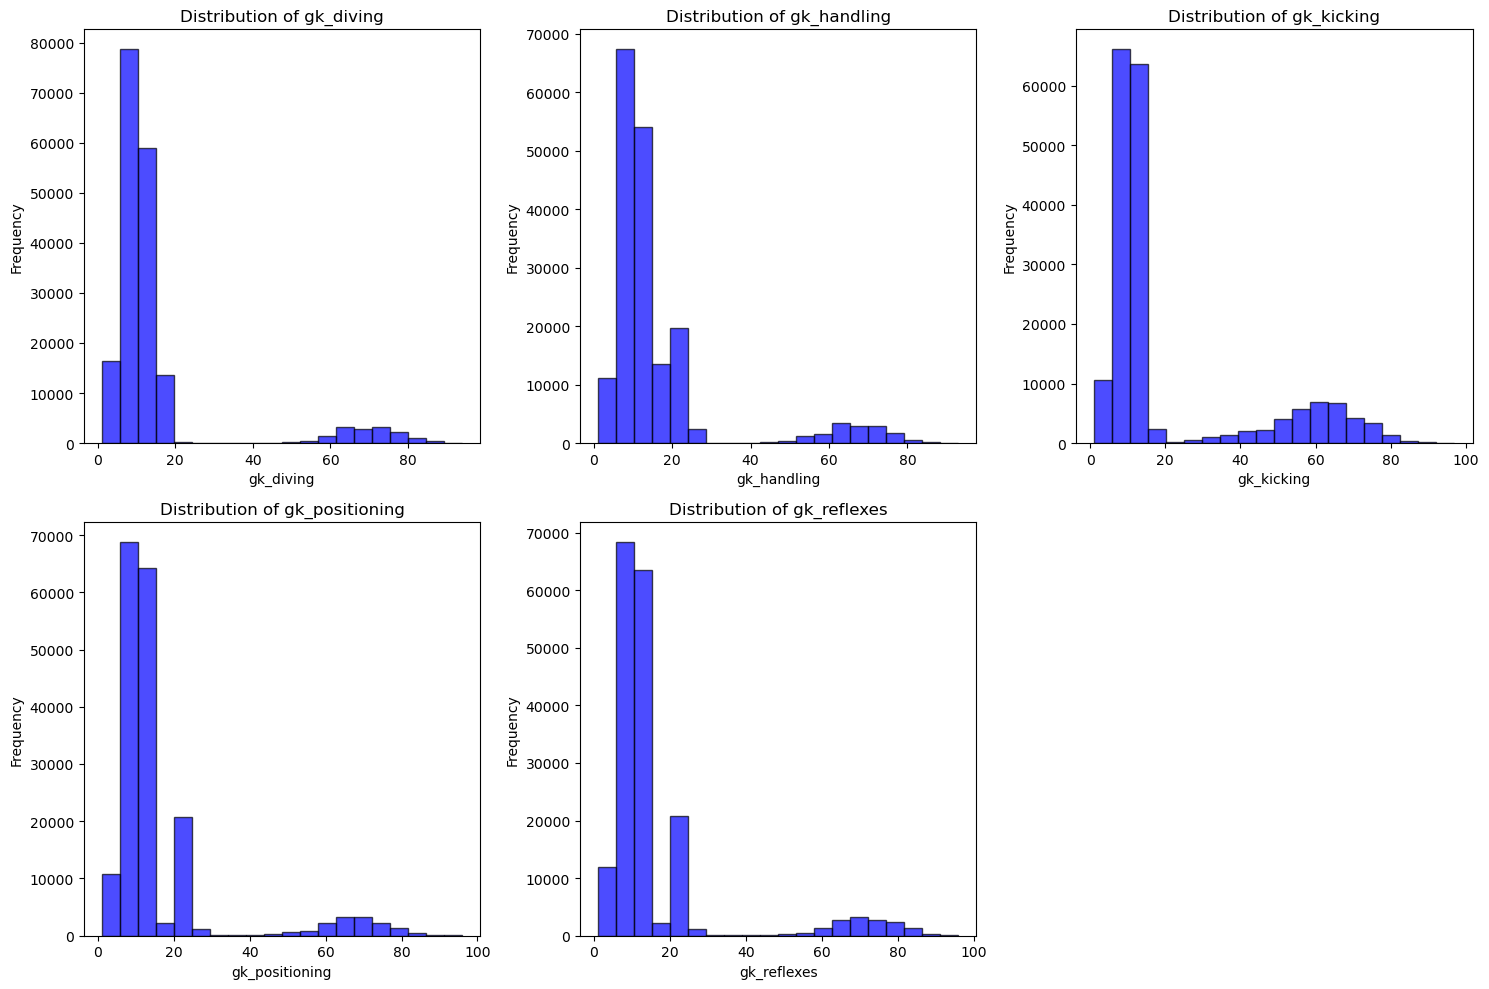

In [32]:
# Goalkeeper attributes
gk_attributes = ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']

# Plot a histogram for each goalkeeper attribute
plt.figure(figsize=(15, 10))

for i, attribute in enumerate(gk_attributes, 1):
    plt.subplot(2, 3, i)
    plt.hist(players_combined[attribute].dropna(), bins=20, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Distribution of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


1. For "gk_diving," "gk_handling," "gk_kicking," and "gk_reflexes," most players are concentrated in the lower skill levels, with very few reaching the highest levels. This suggests that high skill in these areas is rare.
2. For "gk_positioning," the distribution is somewhat more evenly spread out, with a significant number of goalkeepers having mid to high skill levels.

Now create a column 'player_type' to distinguish  if a player is goalkeeper or a field player using information from player_details_df

In [33]:
# Define a threshold to distinguish between outfield players and goalkeepers based on their attributes.
# This threshold could be a minimum rating value that a goalkeeper must have for their specific skills.
GK_THRESHOLD = 50  # Example threshold, adjust based on your dataset's scale

# Goalkeepers typically have non-null goalkeeper stats, field players have these as NaN or zero
goalkeepers = players_combined[players_combined[['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']].max(axis=1) > GK_THRESHOLD]
field_players = players_combined[players_combined[['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']].max(axis=1) < GK_THRESHOLD]

# If you want to add a column to indicate player type, you can do as follows:
players_combined['player_type'] = 'Outfield'
players_combined.loc[players_combined[['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']].max(axis=1) > GK_THRESHOLD, 'player_type'] = 'Goalkeeper'

# Now, 'players_df' will have an additional column 'player_type' indicating whether each player is an outfield player or a goalkeeper
players_combined.head()
print(players_combined.shape)

(183978, 49)


#### Train the the features and apply the random forest model

Root Mean Squared Error: 1.26


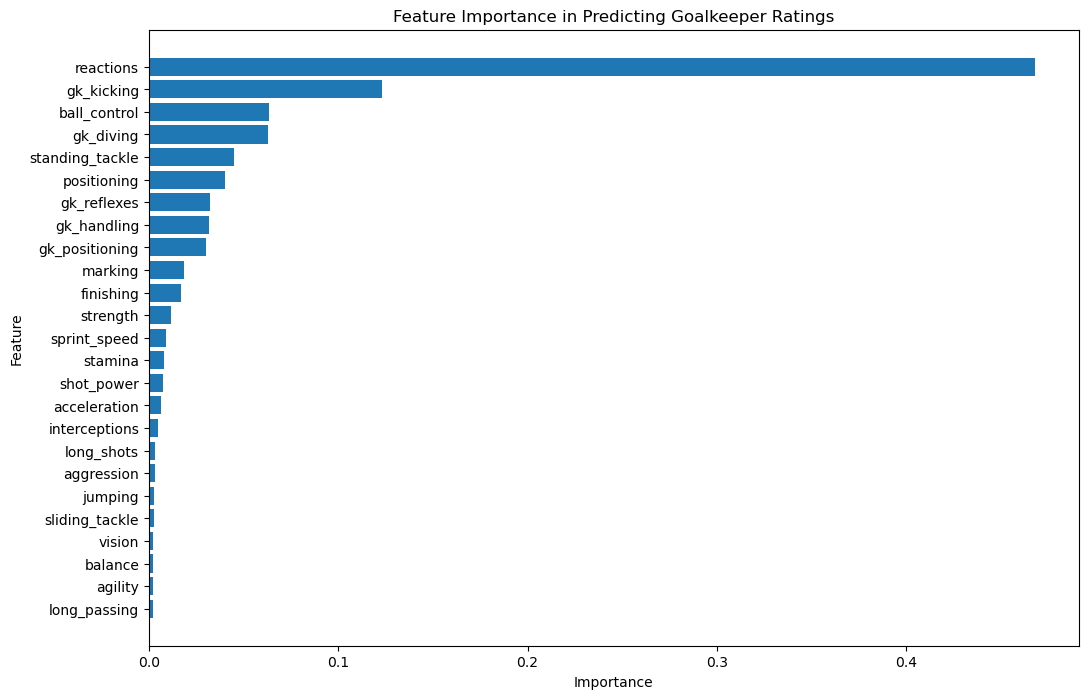

In [34]:
from sklearn.impute import SimpleImputer
# Filter the DataFrame for goalkeepers using the 'player_type' column
goalkeepers_df = players_combined[players_combined['player_type'] == 'Goalkeeper']

# Features that will be used to predict the rating
features = ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes','long_passing', 'ball_control',
    'acceleration','finishing' ,'sprint_speed', 'agility', 'reactions', 'balance',
    'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
    'aggression', 'interceptions', 'positioning', 'vision',
    'marking', 'standing_tackle', 'sliding_tackle']

# Extracting features and target ('overall_rating') from the dataset
X = goalkeepers_df[features]
y = goalkeepers_df['overall_rating']


# Assuming 'X' is your features DataFrame and 'y' is your target series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)


# Initialize the imputer to replace missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Impute the missing values in training and testing sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Drop rows with NaN values in both features and target
X_train_dropped = X_train.dropna()
y_train_dropped = y_train[X_train_dropped.index]
X_test_dropped = X_test.dropna()
y_test_dropped = y_test[X_test_dropped.index]


# Initialize the RandomForestRegressor
regressor = RandomForestRegressor(random_state=42)

# Train the regressor on the imputed or dropped data
regressor.fit(X_train_imputed, y_train)  # or X_train_dropped, y_train_dropped

# Predict the ratings on the testing set
y_pred = regressor.predict(X_test_imputed)  # or X_test_dropped

# Evaluate the model using the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Make sure y_test matches your X_test data
print(f"Root Mean Squared Error: {rmse:.2f}")

# Extract feature importances
importances = regressor.feature_importances_
feature_names = X_train.columns  # Make sure this matches the columns of X_train_imputed or X_train_dropped

# Pair importances with feature names and sort
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Goalkeeper Ratings')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


### Evaluate the perfomance of the model with other prediction methods

In [35]:
# Filter the DataFrame for goalkeepers
goalkeepers = players_combined[players_combined['player_type'] == 'Goalkeeper']

# Calculate the range of 'overall_rating' for goalkeepers
gk_rating_min = goalkeepers['overall_rating'].min()
gk_rating_max = goalkeepers['overall_rating'].max()

print(f"Goalkeeper Rating Range: {gk_rating_min} to {gk_rating_max}")

# Baseline model: always predict the mean overall_rating
mean_rating = y_train.mean()
baseline_preds = [mean_rating] * len(y_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_preds))

print(f"Baseline model RMSE: {baseline_rmse}")

# Compare with a simple linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_imputed, y_train)
lin_reg_preds = lin_reg.predict(X_test_imputed)
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_preds))

print(f"Linear Regression model RMSE: {lin_reg_rmse}")

# Compare the RMSE values
print(f"Model RMSE: {rmse}")
print(f"Improvement over baseline: {baseline_rmse - rmse}")
print(f"Improvement over Linear Regression: {lin_reg_rmse - rmse}")


Goalkeeper Rating Range: 35.0 to 93.0
Baseline model RMSE: 7.466081694944836
Linear Regression model RMSE: 3.4656223606413152
Model RMSE: 1.2629849376822617
Improvement over baseline: 6.203096757262574
Improvement over Linear Regression: 2.2026374229590537


### Summary of Goalkeeper Rating Prediction Models

#### Goalkeeper Rating Range:
- Ratings for goalkeepers range from 35.0 to 93.0.

#### Model Performances:
- **Random Forest Regressor (Our Model):**
  - RMSE: 1.26
  - Indicates an average error of 1.26 rating points in the model's predictions.
  - Suggests good accuracy given the wide range of ratings.
- **Baseline Model (Mean Rating Prediction):**
  - RMSE: 7.47
  - A simple model that always predicts the mean rating.
  - Higher RMSE indicates less accuracy.
- **Linear Regression Model:**
  - RMSE: 3.47
  - Performs better than the baseline but not as well as the Random Forest model.

#### Comparisons and Improvements:
- **Improvement over Baseline:**
  - The Random Forest model shows a significant improvement of 6.20 points in RMSE over the baseline model.
  - This improvement suggests that the Random Forest model has learned meaningful patterns from the data.
- **Improvement over Linear Regression:**
  - An improvement of 2.20 points in RMSE compared to the Linear Regression model.
  - Demonstrates the Random Forest model's higher effectiveness in capturing complex relationships in the data.

#### Interpretation and Conclusion:
- The **Random Forest Regressor outperforms** both the baseline and linear regression models in predicting goalkeeper ratings, indicating its better suitability for capturing the nuances of this specific dataset.
- The **reduced RMSE** in the Random Forest model compared to other models signifies its higher predictive accuracy, making it a more reliable choice for this task.
- Given the wide range of goalkeeper ratings, an RMSE of 1.26 reflects a **reasonably good model performance**, though there may still be room for further enhancements through feature engineering or hyperparameter tuning.


### Cross-Validation  of the model
1. Cross-validation is a statistical method used to estimate the skill of machine learning models. It is commonly used to protect against overfitting in a predictive model, particularly when the dataset is not very large.

2. The most common method is k-fold cross-validation. In k-fold cross-validation, the dataset is randomly split into 'k' equal-sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. 

3. This procedure helps to ensure that your model not only fits the training data well but also has the capacity to generalize well to unseen data.

In [36]:
from sklearn.impute import SimpleImputer

# Initialize and apply the imputer to the entire dataset
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(regressor, X_imputed, y, cv=5, scoring='neg_mean_squared_error')

# Convert the scores to RMSE
rmse_scores = np.sqrt(-cv_scores)

print("RMSE Scores for Each Fold:", rmse_scores)
print("Average RMSE Score:", rmse_scores.mean())



RMSE Scores for Each Fold: [1.85714977 1.87369079 1.75921513 1.72443798 1.81082465]
Average RMSE Score: 1.8050636638222746


### Summary of Cross-Validation Results for Goalkeeper Rating Prediction

#### Cross-Validation Details:
- The RandomForestRegressor model's performance was evaluated using 5-fold cross-validation.
- The chosen metric for evaluation was the Root Mean Squared Error (RMSE), which provides a measure of the model's prediction error.

#### RMSE Scores for Each Fold:
- The RMSE scores across the five folds were as follows:
  - **1st Fold:** 1.86
  - **2nd Fold:** 1.87
  - **3rd Fold:** 1.76
  - **4th Fold:** 1.72
  - **5th Fold:** 1.81

#### Average Performance:
- The **average RMSE across all folds** was approximately **1.80**.

#### Interpretation:
- **Consistency Across Folds:** The RMSE scores show a high degree of consistency across different folds. This indicates that the model's performance is stable and not overly dependent on the specific subset of data used for training.
- **Error Magnitude in Context:** With goalkeeper ratings ranging from 35.0 to 93.0, an average RMSE of 1.80 suggests that the model's predictions are generally within about 5 rating points of the actual values. Given the broad range of ratings, this level of error can be considered moderately low, indicating a good predictive ability.
- **Model Reliability:** The consistency and moderate magnitude of the RMSE scores imply that the RandomForestRegressor model is a reasonably reliable tool for predicting goalkeeper ratings in this dataset.

#### Conclusion:
- The cross-validation results provide evidence of the RandomForestRegressor model's robustness and generalization capability when predicting goalkeeper ratings. While the model exhibits a good level of accuracy, further refinement and tuning could potentially improve its performance.


### Outfield Players Analysis. 

In [37]:
#'player_type' is the column that indicates whether a player is a goalkeeper or outfield player
outfield_players_df = players_combined[players_combined['player_type'] != 'Goalkeeper']

# Features that will be used for prediction - excluding goalkeeper-specific attributes
features = [
    'crossing', 'finishing', 'heading_accuracy', 'short_passing',
    'dribbling', 'curve', 'long_passing', 'ball_control',
    'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
    'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
    'aggression', 'interceptions', 'positioning', 'vision',
    'marking', 'standing_tackle', 'sliding_tackle'
]

# Drop rows with any NaN values in the specified features
outfield_players_df_clean = outfield_players_df.dropna(subset=features)


#outfield_players_df_clean.isna().any()

In [38]:
outfield_players_df_clean['attacking_work_rate'].mode()[0]

'medium'

In [39]:
# Imputing attacking_work_rate with mode i.e. 'Medium'
outfield_players_df_clean.loc [outfield_players_df_clean['attacking_work_rate'].isnull(), 'attacking_work_rate'] = outfield_players_df_clean['attacking_work_rate'].mode()[0]

outfield_players_df_clean.shape

(149939, 49)

#### Train  the  dataset and apply a supervised learning model.

Root Mean Squared Error: 0.84


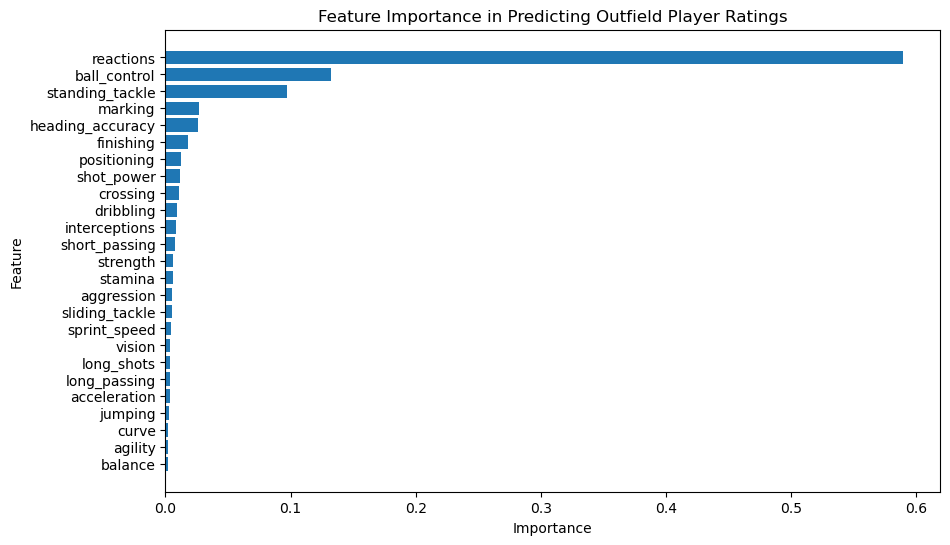

In [40]:
# Extract features and target for outfield players
X = outfield_players_df_clean[features]
y = outfield_players_df_clean['overall_rating']  # You could also use 'potential' here

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Initialize the RandomForestRegressor
regressor = RandomForestRegressor(random_state=42)

# Train the regressor on the training data
regressor.fit(X_train, y_train)

# Predict the ratings on the testing set
y_pred = regressor.predict(X_test)

# Evaluate the model using the root mean squared error(RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")

importances = regressor.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Outfield Player Ratings')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()




#### Feature Importance Analysis from Random Forest Model

The bar chart above represents the feature importances derived from a Random Forest model. These importances indicate how much each feature contributes to the model's predictions. The key takeaways are:

- **Top Features**: The most influential features are `reactions` and `ball_control`, which suggests that a player's reflexes and ball-handling skills are crucial predictors of their overall rating.
- **Defensive Skills**: `standing_tackle` and `marking` are also important, highlighting the significance of defensive capabilities.
- **Physical Attributes**: `strength` and `stamina` are less important than skill-based features but still provide substantial predictive power.
- **Lesser Impact Features**: Attributes like `balance`, `agility`, and `curve` have a lower importance score, indicating they have a smaller effect on the overall rating in the model.

This analysis can guide feature selection for future model refinement by focusing on the most predictive attributes.


 ### Test the performance  of the random forest against other models

In [41]:
# Filter the DataFrame for outfield players
outfield_players = players_combined[players_combined['player_type'] == 'Outfield']

# Calculate the range of 'overall_rating' for goalkeepers
outfield_rating_min = outfield_players['overall_rating'].min()
outfield_rating_max = outfield_players['overall_rating'].max()

print(f"outfield_players Rating Range: {outfield_rating_min} to {outfield_rating_max}")

# Baseline model: always predict the mean overall_rating
mean_rating = y_train.mean()
baseline_preds = [mean_rating] * len(y_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_preds))

print(f"Baseline model RMSE: {baseline_rmse}")

# Compare with a simple linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_preds = lin_reg.predict(X_test)
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_preds))

print(f"Linear Regression model RMSE: {lin_reg_rmse}")

# Compare the RMSE values
print(f"Model RMSE: {rmse}")
print(f"Improvement over baseline: {baseline_rmse - rmse}")
print(f"Improvement over Linear Regression: {lin_reg_rmse - rmse}")


outfield_players Rating Range: 33.0 to 94.0
Baseline model RMSE: 6.87757539374635
Linear Regression model RMSE: 3.0153676853887883
Model RMSE: 0.844015521596636
Improvement over baseline: 6.033559872149715
Improvement over Linear Regression: 2.1713521637921525


### Summary of Outfield Players Rating Prediction Models

#### Rating Range for Outfield Players:
- Ratings vary from 33.0 to 94.0, indicating a wide spectrum of player abilities.

#### Model Performances:
- **Random Forest Regressor (Our Model):**
  - **RMSE:** 0.844
  - The RMSE indicates that the model's predictions are, on average, less than one rating point away from actual values, showing high accuracy.
- **Baseline Model (Mean Rating Prediction):**
  - **RMSE:** 6.878
  - This simpler model, predicting the average rating for all cases, has a significantly higher RMSE, indicating lower accuracy.
- **Linear Regression Model:**
  - **RMSE:** 3.015
  - Better than the baseline but less accurate than the Random Forest model.

#### Comparisons and Improvements:
- **Improvement over Baseline:**
  - The Random Forest model shows a remarkable improvement of about 6.03 points in RMSE over the baseline model, indicating a significant increase in predictive accuracy.
- **Improvement over Linear Regression:**
  - An improvement of approximately 2.17 points in RMSE compared to Linear Regression, highlighting the superior performance of the Random Forest in this context.

#### Interpretation and Conclusion:
- The **Random Forest Regressor demonstrates excellent predictive performance** in estimating outfield players' ratings, significantly surpassing both the baseline and linear regression models.
- The **low RMSE** of 0.844, particularly in the context of the wide range of ratings, underscores the model's effectiveness and precision in predictions.
- Such a high level of accuracy suggests that the model has effectively captured the underlying patterns and relationships in the data, making it a highly reliable tool for rating predictions.
- Despite its current performance, exploring additional features or fine-tuning the model could provide even more precise predictions.

Overall, the Random Forest model's outstanding improvement over both the baseline and linear regression models showcases its suitability and robustness for predicting outfield players' ratings.


### Cross-Validation  of the model
1. Cross-validation is a resampling procedure used to evaluate a model if the results are generalizable to an independent data set. 
2. It's particularly useful with models like Random Forest when you want to tune hyperparameters and assess how the model will perform in practice.

In [42]:
# Perform 5-fold cross-validation
# 'neg_mean_squared_error' is used as the scoring metric
cv_scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the scores to RMSE (Root Mean Squared Error)
rmse_scores = np.sqrt(-cv_scores)

print("RMSE Scores for Each Fold:", rmse_scores)
print("Average RMSE Score:", rmse_scores.mean())


RMSE Scores for Each Fold: [1.52425599 1.54726999 1.48112246 1.48731626 1.52638117]
Average RMSE Score: 1.5132691760221832


### Summary of Cross-Validation Results for Player Rating Prediction

#### Cross-Validation Overview:
- Conducted a 5-fold cross-validation on the model predicting player ratings.
- The Root Mean Squared Error (RMSE) was used as the metric to assess the model's prediction accuracy.

#### RMSE Scores for Each Fold:
- The RMSE scores for the individual folds were as follows:
  - **1st Fold:** 1.524
  - **2nd Fold:** 1.547
  - **3rd Fold:** 1.481
  - **4th Fold:** 1.487
  - **5th Fold:** 1.526

#### Average RMSE Score:
- The average RMSE across all folds was approximately **1.513**.

#### Interpretation:
- **Consistency Across Folds:** The RMSE scores show a high degree of consistency across the different folds. This indicates that the model's performance is stable and reliable, not overly sensitive to the specific subsets of data used in each fold.
- **Low Magnitude of Error:** An average RMSE of about 1.513 suggests that the model's predictions are, on average, around 1.5 points away from the actual player ratings. Considering player ratings often range broadly (e.g., 0-100), an RMSE of this magnitude indicates a high level of prediction accuracy.
- **Model's Predictive Power:** The low and consistent RMSE scores across all folds suggest that the model is effectively capturing the underlying patterns in the data, making it a robust tool for predicting player ratings.

#### Conclusion:
- The cross-validation results with an average RMSE of 1.513 highlight the model's strong predictive ability in estimating player ratings. The consistency in performance across different data splits reinforces the model's reliability and applicability in scenarios where accurate player rating predictions are essential.


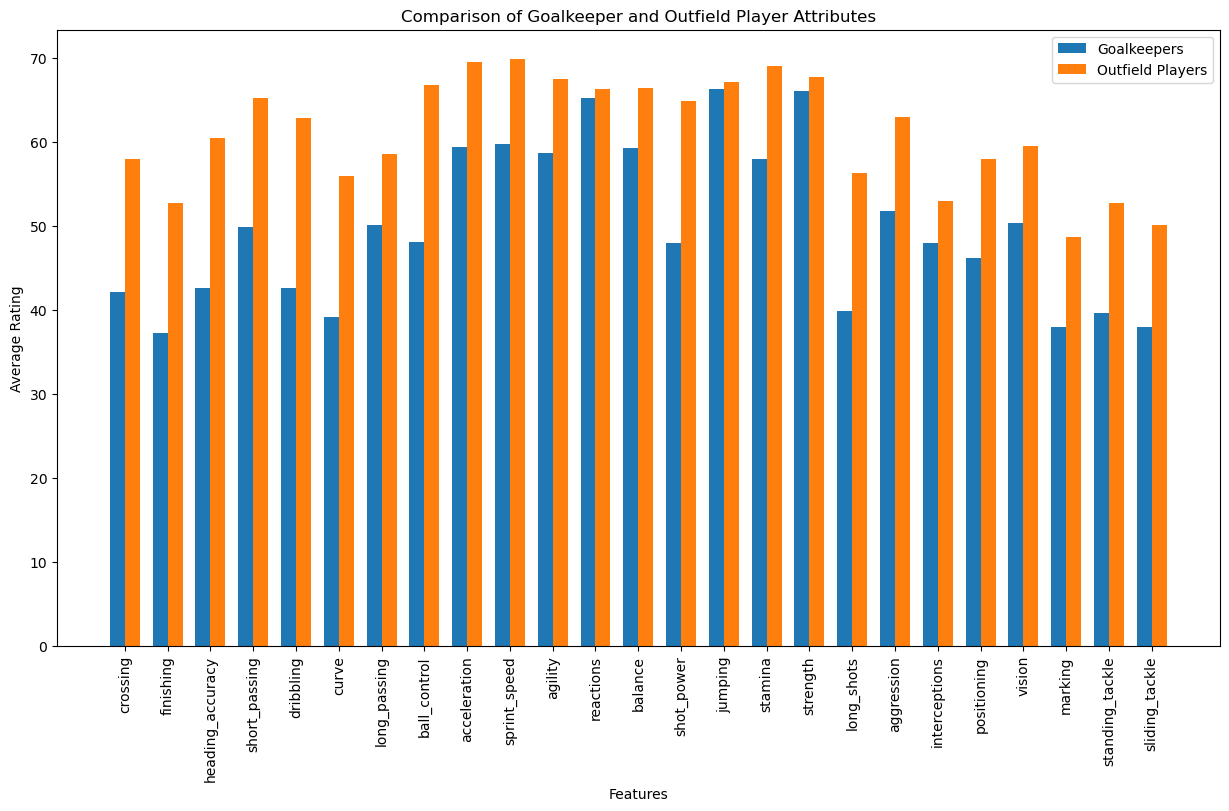

In [43]:
# Calculate average for each feature
avg_gk_features = goalkeepers_df[features].mean()
avg_outfield_features = outfield_players_df[features].mean()

# Setting the positions and width for the bars
positions = np.arange(len(features))
width = 0.35

# Plotting
plt.figure(figsize=(15, 8))
plt.bar(positions - width/2, avg_gk_features, width, label='Goalkeepers')
plt.bar(positions + width/2, avg_outfield_features, width, label='Outfield Players')

# Adding labels and title
plt.xlabel('Features')
plt.ylabel('Average Rating')
plt.title('Comparison of Goalkeeper and Outfield Player Attributes')
plt.xticks(positions, features, rotation=90)
plt.legend()

plt.show()

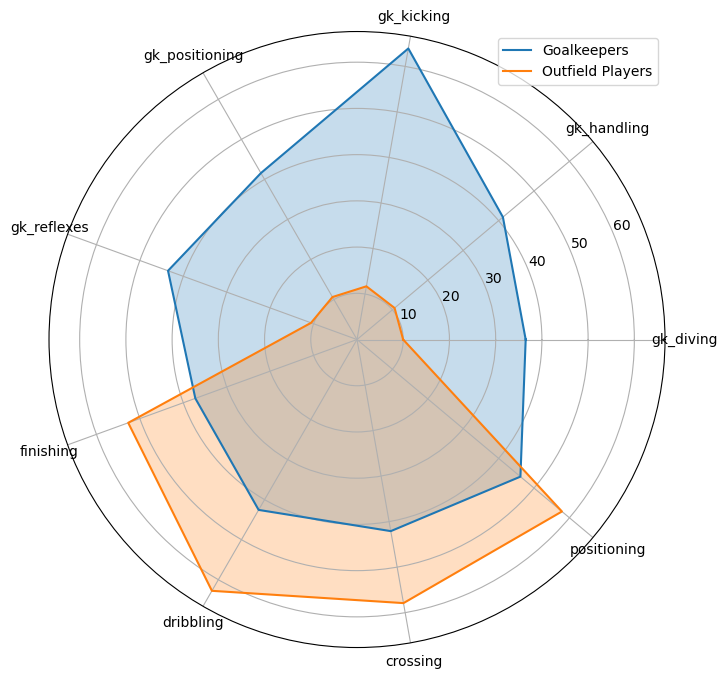

In [44]:
from math import pi

# Assuming I've selected a subset of most important features
selected_features = ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes','finishing','dribbling',
            'crossing', 'positioning']

# Recalculate averages for the selected features
avg_gk_selected = goalkeepers_df[selected_features].mean()
avg_outfield_selected = outfield_players_df[selected_features].mean()

# Number of variables
num_vars = len(selected_features)

# Compute angle for each axis
angles = np.linspace(0, 2 * pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Radar chart for goalkeepers
values_gk = avg_gk_selected.tolist()
values_gk += values_gk[:1]

# Radar chart for outfield players
values_outfield = avg_outfield_selected.tolist()
values_outfield += values_outfield[:1]

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, values_gk, label='Goalkeepers')
ax.fill(angles, values_gk, alpha=0.25)
ax.plot(angles, values_outfield, label='Outfield Players')
ax.fill(angles, values_outfield, alpha=0.25)

# Labels for each point
ax.set_xticks(angles[:-1])
ax.set_xticklabels(selected_features)

plt.legend()
plt.show()


# 2. Predicting match outcomes
To be able to predict  home wins, away wins or draw

## Data Integration and Preprocessing
1. Joining tables(some have been done already and will do the rest as at when it is needed)
2. Creating features


### 1. Joining Tables or datasets


#### Streamlined Addition of Player Ratings to Match Data:

This updated code efficiently adds the latest overall ratings of players to the `matches` DataFrame:

- **Column Initialization:** We start by creating new columns in `matches` for each player's overall rating, initializing them as NaN.

- **Preprocessing Player Data:** `player_details_df` is sorted by player ID and date to ensure the most recent record for each player is easily accessible. We then extract the latest overall rating for each player.

- **Merging Ratings with Matches Data:** Using a loop, we merge these ratings into the `matches` DataFrame for each player. The merge is done on the player ID columns, aligning each player's latest rating with their respective matches.

- **Result:** The `matches` DataFrame is now enhanced with additional columns representing the latest overall ratings of each player, both home and away, at the time of each match. This approach is more efficient than the initial nested loop method, reducing computational overhead and runtime.


In [45]:
# Assuming 'matches' is your matches DataFrame
# Assuming 'player_details_df' is your player details DataFrame

# Define the list of player columns
players = ['home_player_1', 'home_player_2', 'home_player_3', "home_player_4", "home_player_5",
           "home_player_6", "home_player_7", "home_player_8", "home_player_9", "home_player_10",
           "home_player_11", "away_player_1", "away_player_2", "away_player_3", "away_player_4",
           "away_player_5", "away_player_6", "away_player_7", "away_player_8", "away_player_9",
           "away_player_10", "away_player_11"]

# Sort player_details_df by player ID and date
player_details_df.sort_values(by=['player_api_id', 'date'], ascending=[True, False], inplace=True)

# Group by player ID and take the first entry (latest rating)
latest_ratings = player_details_df.groupby('player_api_id').first()['overall_rating']

# Update the player ID columns in matches with the latest overall ratings
for player in players:
    # Map the player IDs to their latest overall ratings
    matches[player] = matches[player].map(latest_ratings)

# Now 'matches' DataFrame has the player ID columns updated with the latest overall ratings


In [46]:
# Display the first few rows to see the updated columns
#print(matches.head())

# Check for NaN values in the player columns
#print(matches[players].isna().sum())

# Get summary statistics for the player columns
#print(matches[players].describe())

# Check unique values in a specific player column (example: home_player_1)
#print(matches['home_player_1'].unique())


#### Replace NaN values with each player's column with their respective mean rating.

In [47]:

# Loop through each player column
for player in players:
    # Calculate the mean rating for the current player, excluding NaN values
    mean_rating = matches[player].mean()
    
    # Fill NaN values in this player's column with their mean rating
    matches[player].fillna(mean_rating, inplace=True)

# Now the NaN values in player rating columns have been filled with the respective player's mean rating


#### Last X Wins Analysis:
This section of the code is focused on calculating the recent performance of both the home and away teams in their last `x` number of matches. It sorts the matches by date and then for each match, identifies the last `x` matches played by both the home and away teams separately. It then calculates the number of wins for each team in these matches and adds this information as new columns in the DataFrame. This analysis is crucial for understanding each team's current form and performance.


In [48]:
# Assuming 'matches' is your DataFrame with match details

# Specify the number of past matches you want to retrieve as a feature
number_of_matches = 10

# Sort the matches by date to ensure the order is correct
matches.sort_values(by='date', ascending=True, inplace=True)

# Function to calculate rolling wins

def calculate_rolling_wins(df, team_id_column):
    # Calculate wins and create a rolling window
    wins = (df[team_id_column] == df['home_team_api_id']) & (df['home_team_goal'] > df['away_team_goal'])
    rolling_wins = wins.rolling(window=number_of_matches, min_periods=1).sum()

    # Shift to ensure the current match is not included
    return rolling_wins.shift(1)

# Calculating rolling wins for home and away teams
matches['home_team_rolling_wins'] = calculate_rolling_wins(matches, 'home_team_api_id')
matches['away_team_rolling_wins'] = calculate_rolling_wins(matches, 'away_team_api_id')

# Rename columns for clarity
matches.rename(columns={'home_team_rolling_wins': 'home_team_last_x_wins', 
                        'away_team_rolling_wins': 'away_team_last_x_wins'}, inplace=True)

# The 'matches' DataFrame now includes rolling win counts for the last x matches for both home and away teams
# matches.head() # to check if the merge worked

#### Historical Head-to-Head Performance:
In this section, the code is tailored to analyze the historical performance between the two teams in a match. It focuses on their past encounters, regardless of the venue. After sorting by date, it filters out the matches where these two teams have faced each other before the current match's date. It then calculates and records a summary statistic (like the count of wins for the home team in these encounters) in a new column. This approach provides insights into the historical rivalry and performance dynamics between the specific teams.


In [49]:
# Sort the matches by date to ensure chronological order
matches.sort_values(by='date', ascending=True, inplace=True)

# Function to calculate historical head-to-head performance for home wins, away wins, and draws
def calculate_h2h_performance(matches_df, team1, team2):
    # Filter matches to find encounters between the two teams before the date of the current match
    past_encounters = matches_df[((matches_df['home_team_api_id'] == team1) & (matches_df['away_team_api_id'] == team2) |
                                  (matches_df['home_team_api_id'] == team2) & (matches_df['away_team_api_id'] == team1))]

    # Calculate the count of wins for the home team and the away team in these encounters
    team1_home_wins = ((past_encounters['home_team_api_id'] == team1) & 
                       (past_encounters['home_team_goal'] > past_encounters['away_team_goal'])).sum()
    team1_away_wins = ((past_encounters['away_team_api_id'] == team1) & 
                       (past_encounters['away_team_goal'] > past_encounters['home_team_goal'])).sum()
    draws = (past_encounters['home_team_goal'] == past_encounters['away_team_goal']).sum()
    
    return team1_home_wins + team1_away_wins, draws

# Apply the function for each match
matches[['h2h_total_wins', 'h2h_draws']] = matches.apply(lambda x: calculate_h2h_performance(matches, x['home_team_api_id'], x['away_team_api_id']), axis=1, result_type='expand')

# The 'matches' DataFrame now includes new columns 'h2h_total_wins' and 'h2h_draws'




#### Total Goals Calculation for Teams:

In this code block, we are enhancing the `matches` DataFrame by adding two new columns: `home_team_total_goals` and `away_team_total_goals`. These columns are intended to store the cumulative goals scored by each team across all matches when they played as the home team and away team, respectively.

- **Initialization:** We start by initializing these columns with zeros for all rows in the DataFrame.

- **Goals Calculation:** The calculation is performed team-wise. For each unique team identified in the `home_team_api_id` column, we calculate two sums:
    1. **Home Goals:** The total number of goals scored by the team in all matches where they played as the home team.
    2. **Away Goals:** The total number of goals scored by the team in all matches where they played as the away team.

- **Updating DataFrame:** After calculating these sums, we update the corresponding rows in the `matches` DataFrame. For each team, we set the `home_team_total_goals` and `away_team_total_goals` columns with the calculated sums of home and away goals, respectively.

This process results in enriching the `matches` DataFrame with comprehensive goal statistics for each team, reflecting their overall performance in the tournament or league, both at home and away.


In [50]:
# Initialize new columns for total home and away goals
matches['home_team_total_goals'] = 0
matches['away_team_total_goals'] = 0

# Calculate total goals for each team in the DataFrame
for team in matches['home_team_api_id'].unique():
    # Calculate total home and away goals for the team
    home_goals = matches.home_team_goal[matches.home_team_api_id == team].sum()
    away_goals = matches.away_team_goal[matches.away_team_api_id == team].sum()

    # Update the DataFrame with the total goals for the team
    matches.loc[matches['home_team_api_id'] == team, 'home_team_total_goals'] = home_goals
    matches.loc[matches['away_team_api_id'] == team, 'away_team_total_goals'] = away_goals

# Now 'matches' dataframe contains two new columns with the total goals scored by each team


#### Calculation of Goals Conceded and Team Wins:

This code block focuses on enhancing the `matches` DataFrame by adding new columns related to goals conceded and wins for both home and away teams.
- **New Columns:** We add `home_team_goals_conceded`, `away_team_goals_conceded`, `home_team_wins`, and `away_team_wins`.

- **Goals Conceded Calculation:** For each match, we calculate how many goals each team (home and away) has conceded in past matches, considering their role (home/away) in those matches.

- **Wins Calculation:** We also count the total wins for each team, distinguishing between their performances as home and away teams.

- **Updating DataFrame:** Each match row is updated with these calculated statistics, providing a comprehensive view of each team's defensive and winning performance.


In [51]:
# Initialize new columns for goals conceded and wins for both home and away teams
matches['home_team_goals_conceded'] = 0
matches['away_team_goals_conceded'] = 0
matches['home_team_wins'] = 0
matches['away_team_wins'] = 0

# Iterate over each match in the DataFrame to calculate goals conceded and wins
for index, match in matches.iterrows():
    # Extract teams playing in the current match
    home_team = match['home_team_api_id']
    away_team = match['away_team_api_id']
    
    # Calculate goals conceded when the current home team played as away
    home_team_goals_conceded_as_away = matches.loc[
        (matches['away_team_api_id'] == home_team), 'home_team_goal'].sum()

    # Calculate goals conceded when the current away team played as home
    away_team_goals_conceded_as_home = matches.loc[
        (matches['home_team_api_id'] == away_team), 'away_team_goal'].sum()

    # Calculate wins for the home team
    home_team_wins = matches.loc[
        (matches['home_team_api_id'] == home_team) & (matches['home_team_goal'] > matches['away_team_goal']), 'home_team_api_id'].count()

    # Calculate wins for the away team
    away_team_wins = matches.loc[
        (matches['away_team_api_id'] == away_team) & (matches['away_team_goal'] > matches['home_team_goal']), 'away_team_api_id'].count()

    # Update the DataFrame with the calculated stats
    matches.at[index, 'home_team_goals_conceded'] = home_team_goals_conceded_as_away
    matches.at[index, 'away_team_goals_conceded'] = away_team_goals_conceded_as_home
    matches.at[index, 'home_team_wins'] = home_team_wins
    matches.at[index, 'away_team_wins'] = away_team_wins

# Now 'matches_df' contains new columns with the calculated goals conceded and wins for each team in each match


### Machine Learning Model to Predict Match Outcomes:

This code segment is about setting up and evaluating a machine learning model to predict soccer match outcomes:

- **Outcome Encoding:** First, we encode the match outcomes ('Home Win', 'Away Win', 'Draw') into integers for computational efficiency.

- **Feature Selection:** We define a set of features that are expected to influence match outcomes, like team wins, past encounters, goals scored, and conceded.

- **Data Preparation:** The data is split into features (X) and the target variable (y), with the target being the encoded match results.

- **Model Training and Testing:** We use the RandomForestClassifier, a robust algorithm suitable for classification tasks. The dataset is divided into training and testing sets, with the model trained on the former and predictions made on the latter.

- **Model Evaluation:** The model's performance is assessed using classification metrics such as accuracy and a detailed classification report, providing insights into its predictive capabilities.


In [52]:
# Calculate average ratings for home and away teams
matches['home_team_avg_rating'] = matches[[p for p in players if 'home_player' in p]].mean(axis=1)
matches['away_team_avg_rating'] = matches[[p for p in players if 'away_player' in p]].mean(axis=1)


In [53]:
# Mapping match outcomes to integers for easier analysis
outcome_mapping = {"Home Win": 1, "Away Win": 2, "Draw": 0}
matches['results_encoded'] = matches['result'].map(outcome_mapping)

# Selecting the relevant features for predictive modeling
feature_cols = ['home_team_wins', 'away_team_wins', 'h2h_total_wins', 'h2h_draws',
                'home_team_last_x_wins', 'away_team_last_x_wins', 'home_team_total_goals', 
                'away_team_total_goals', 'home_team_goals_conceded', 'away_team_goals_conceded',
                'home_team_avg_rating', 'away_team_avg_rating']

# Identifying the target column (encoded match results)
target_col = 'results_encoded'

# Splitting data into features (X) and target (y) for the model
X = matches[feature_cols].fillna(0)
y = matches[target_col]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training a Random Forest Classifier
#model = RandomForestClassifier(n_estimators=100, random_state=42)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Making predictions using the test data
y_pred = model.predict(X_test)

# Evaluating the model's performance
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.47      0.28      0.35      1325
           1       0.60      0.78      0.68      2341
           2       0.53      0.47      0.50      1530

    accuracy                           0.56      5196
   macro avg       0.53      0.51      0.51      5196
weighted avg       0.55      0.56      0.54      5196

Accuracy: 0.562933025404157


### Logistic Regression Model Performance Analysis

The performance metrics of the logistic regression model reveal several key insights:

#### Overall Performance:
- **Accuracy:** The model now has an accuracy of approximately 56%. This is a slight improvement, indicating that the model correctly predicts the match outcome about 56% of the time.

#### Class-wise Performance:
1. **Class 0 (Draw):**
   - **Precision:** 47%, indicating that nearly half of the matches predicted as draws were actually draws.
   - **Recall:** 28%, showing that the model correctly identified 28% of all actual draws.
   - **F1-Score:** 35%, a balance between precision and recall, suggesting moderate performance in predicting draws.

2. **Class 1 (Home Win):**
   - **Precision:** 60%, meaning 60% of predicted home wins were correct.
   - **Recall:** 77%, indicating the model correctly identified 77% of all actual home wins.
   - **F1-Score:** 68%, showing good performance in predicting home wins.

3. **Class 2 (Away Win):**
   - **Precision:** 53%, suggesting that just over half of the predicted away wins were accurate.
   - **Recall:** 47%, meaning the model correctly identified 47% of all actual away wins.
   - **F1-Score:** 50%, indicating moderate performance in predicting away wins.

#### Macro and Weighted Averages:
- **Macro Average:** Average performance across classes (53% precision, 51% recall, 51% F1-score) shows balanced but moderate performance.
- **Weighted Average:** Considering class imbalance, the weighted averages (55% precision, 56% recall, 54% F1-score) suggest slightly better performance, mainly driven by the model's ability to predict home wins.

### Observations and Recommendations:

- The model shows the strongest performance in predicting home wins, with significant improvements in recall and F1-score for this class.
- There's a notable improvement in predicting draws, but it still remains a challenging outcome for the model, as evidenced by the relatively low recall.
- The performance in predicting away wins is moderately good but has potential for improvement.
- Ongoing efforts could focus on enhancing features related to predicting draws and away wins, possibly through more detailed team statistics or contextual information.
- Further model tuning or exploring different algorithms might yield additional improvements, especially in balancing the prediction capabilities across all outcome classes.



### Making a Plot

[[ 373  627  325]
 [ 204 1829  308]
 [ 218  589  723]]


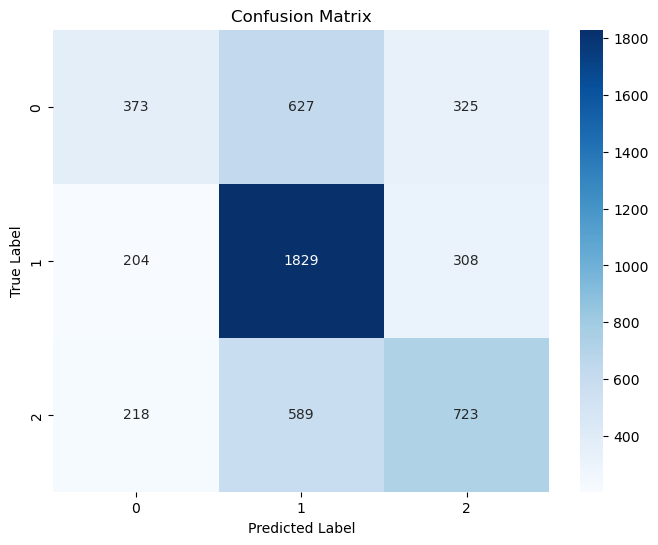

In [54]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Confusion Matrix Interpretation

The confusion matrix for the updated model provides a detailed view of its performance across different match outcomes. Here's the breakdown:

#### Matrix Structure:
- The matrix is a 3x3 grid, corresponding to the three outcome classes: 0 (Draw), 1 (Home Win), and 2 (Away Win).
- Rows represent the actual classes (true outcomes), while columns represent the predicted classes (model predictions).

#### Detailed Breakdown:

1. **Class 0 (Draw):**
   - **True Positives (TP):** 373 matches were correctly predicted as draws.
   - **False Positives (FP):** 627 + 325 = 952 matches were incorrectly predicted as draws (predicted as draws but were actually home or away wins).
   - **False Negatives (FN):** Actual draws that were predicted as home or away wins.

2. **Class 1 (Home Win):**
   - **TP:** 1,829 matches were correctly identified as home wins.
   - **FP:** 204 + 308 = 512 matches were false positives (predicted as home wins but were actually draws or away wins).
   - **FN:** Home wins that were predicted as draws or away wins.

3. **Class 2 (Away Win):**
   - **TP:** 723 matches were correctly predicted as away wins.
   - **FP:** 218 + 589 = 807 matches were false positives (predicted as away wins but were actually draws or home wins).
   - **FN:** Away wins that were predicted as draws or home wins.



### Conclusion on match outcome prediction 

1. Your model is most effective in predicting home wins. This suggests that the features and patterns specific to home team victories are well understood and captured by the model.
2. While there's an improvement in predicting draws, it remains a challenging outcome for the model.
3. The model exhibits moderate accuracy in predicting away wins. The presence of false positives indicates some level of confusion between home and away wins. 

In summary, while the model shows promise, especially in predicting home wins, its ability to accurately predict draws and away wins requires further improvement. 

In [55]:
matches['result'].unique()

array(['Away Win', 'Home Win', 'Draw'], dtype=object)

# 3. Betting Odds Analysis
The objective is this is to  examine the relationship between betting odds and match outcomes.
1. To do this I will include the betting odds provided by boookmarkers as main features.
2. The target vairable is  to be the match outcome in the results column. I will analyse the home team  with Win = 'Home win', Loss = 'Away win' and draw is  draw

#### Define the Encoding Function

In [56]:
def encode_outcome(row):
    if row['result'] == 'Home Win':
        return 1  # Win
    elif row['result'] == 'Away Win':
        return 2 # Loss
    else:  # Assuming the only other option is 'Draw'
        return 0  # Draw

    

#### Apply the function to create result_encoded

In [57]:

matches['result_encoded'] = matches.apply(encode_outcome, axis=1)


In [58]:
print("Unique values in 'result' column:", matches['result'].unique())
print("NaN values in 'result_encoded':", matches['result_encoded'].isna().sum())


Unique values in 'result' column: ['Away Win' 'Home Win' 'Draw']
NaN values in 'result_encoded': 0


In [59]:
from sklearn.ensemble import GradientBoostingClassifier
#Select betting odds columns as features
feature_cols = [
    'B365H', 'B365D', 'B365A',   # Bet365 odds for Home win, Draw, Away win
    'BWH', 'BWD', 'BWA',         # Betway odds for Home win, Draw, Away win
    'IWH', 'IWD', 'IWA',         # Interwetten odds for Home win, Draw, Away win
    'LBH', 'LBD', 'LBA',         # Ladbrokes odds for Home win, Draw, Away win
    'PSH', 'PSD', 'PSA',         # Pinnacle Sports odds for Home win, Draw, Away win
    'WHH', 'WHD', 'WHA',         # William Hill odds for Home win, Draw, Away win
    'SJH', 'SJD', 'SJA',         # Stan James odds for Home win, Draw, Away win
    'VCH', 'VCD', 'VCA',         # VC Bet odds for Home win, Draw, Away win
    'GBH', 'GBD', 'GBA',         # Gamebookers odds for Home win, Draw, Away win
    'BSH', 'BSD', 'BSA'          # Blue Square odds for Home win, Draw, Away win
]

for col in feature_cols:
    matches[col].fillna(0, inplace=True)


# Loop through each betting column and fill NaN values with the median of that column
#for col in feature_cols:
    #median_value = matches[col].mean()
    #matches[col].fillna(median_value, inplace=True)
    
X = matches[feature_cols]
y = matches['result_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
#model = RandomForestClassifier(random_state=42)
model = GradientBoostingClassifier(random_state = 42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.30      0.01      0.01      1325
           1       0.52      0.86      0.65      2341
           2       0.49      0.41      0.45      1530

    accuracy                           0.51      5196
   macro avg       0.44      0.43      0.37      5196
weighted avg       0.46      0.51      0.43      5196

Accuracy: 0.5102001539645882


### Summary of Classification Model Results

#### Key Points:
- **Overall Accuracy:** The model achieved an accuracy of approximately 51.02%, indicating moderate predictive performance.
- **Performance by Class:**
  - **Away Wins'/Loss (2):** 
    - Moderate precision (49%) but lower recall (41%), indicating conservative prediction of away wins.
  - **Draws (0):** 
    - Significantly low recall (1%) and precision (30%), suggesting a notable struggle in accurately predicting draws.
  - **Home Wins / Win(1):** 
    - Higher recall (86%) with reasonable precision (52%), showing a stronger ability to predict home wins.

#### Insights:
- The model demonstrates a clear **bias towards predicting home wins** more accurately compared to away wins or draws.
- **Difficulty in predicting draws** is a standout issue, with the model largely failing to identify such outcomes.
- There exists a potential **relationship between betting odds and match outcome**, as evidenced by the varying precision and recall across different outcomes. The model's better performance in predicting home wins might be influenced by betting odds typically favoring home teams, reflecting common trends in football betting markets.

#### Recommendations for Improvement:
- **Enhance Feature Engineering:** Investigate additional features or refine existing ones to improve the model's ability to distinguish between all match outcomes, especially draws.
- **Consider Model and Data Adjustments:** Explore different algorithms, parameter tuning, and techniques to address class imbalance, which could enhance the model's overall prediction accuracy and balance.

#### Conclusion:
The analysis reveals a moderate level of prediction accuracy with notable areas for improvement. The model's performance indicates that while betting odds are informative, they may not capture the complete picture of match dynamics, particularly for draws and away wins.


##### Confusion Matrix Heatmap
Visualize the performance of your model in predicting match outcomes.



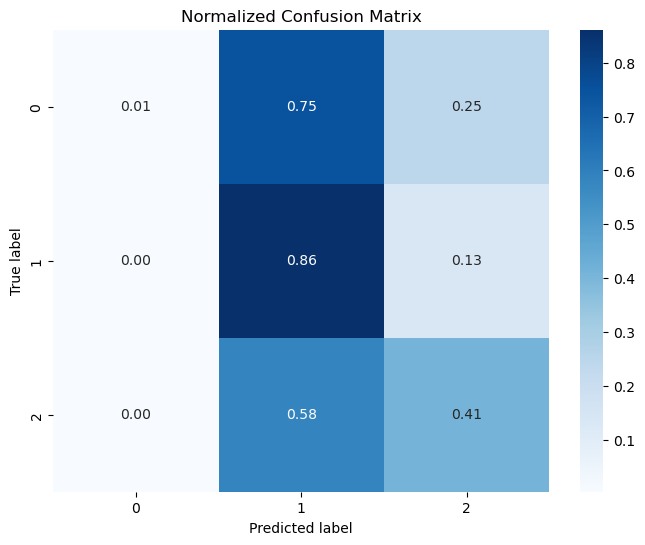

In [60]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.title('Normalized Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



### Normalised  Confusion Matrix Analysis Summary


#### True Positive Rates by Outcome:
- **Draws (Label 0):** The model has a very low true positive rate for draws, indicating it rarely predicts a draw when it actually occurs.
- **Home Wins (Label 1):** The model predicts home wins with high confidence, showing a strong true positive rate.
- **Away Wins (Label 2):** The model is moderately accurate at predicting away wins, with a true positive rate that suggests some room for improvement.

####  Misclassification Insights:
- **Draws:** A significant number of draws are misclassified as either home or away wins, as indicated by the low true positive rate for draws.
- **Home Wins:** There is some confusion between home wins and away wins, but to a lesser extent compared to draws.
- **Away Wins:** Away wins are more often confused with home wins than draws, as shown by the model's predictions.

#### Overall Observations:
- The model demonstrates a strong bias toward predicting home wins and struggles to accurately identify draw outcomes.
- The prediction of away wins is better than draws but not as accurate as home wins.

#### Recommendations for Model Improvement:
- Explore strategies to better distinguish between all three outcomes, particularly improving the prediction of draws and away wins.
- Adjust the model or consider additional features that could provide more balanced outcome predictions.



### Feature Importance Analysis
Examine the feature importances attribute of the model. This will tell you which betting odds are most influential in predicting match outcomes.



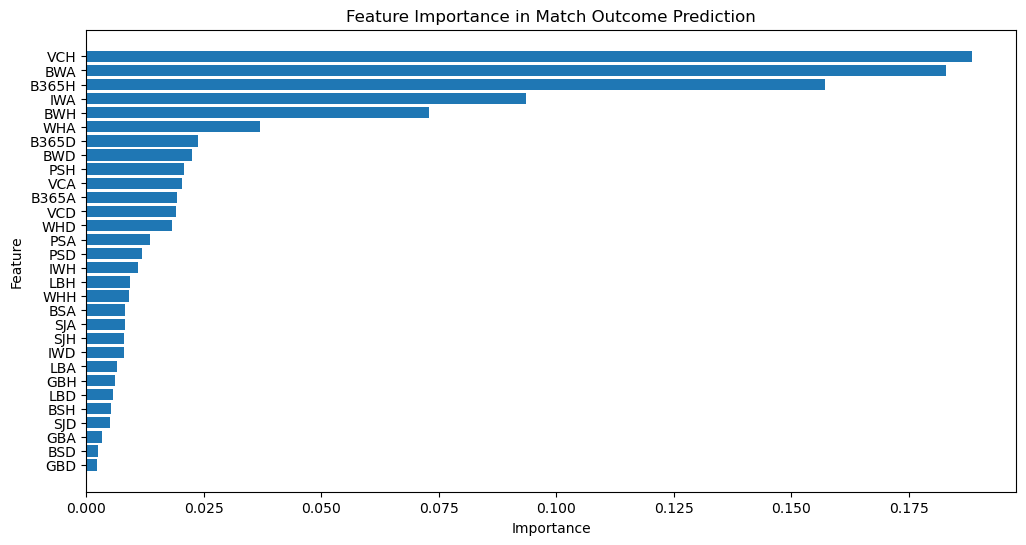

In [61]:
# Get feature importances
feature_importances = model.feature_importances_

# Match feature importances with the corresponding column names
features = X_train.columns
importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importances.sort_values(by='Importance', ascending=False, inplace=True)

#Visualization
# Plot
plt.figure(figsize=(12, 6))
plt.barh(importances['Feature'], importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Match Outcome Prediction')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()




###  Feature Importance for Betting Odds  Features 

The bar chart above shows the feature importances determined by a model for predicting football match outcomes. These features are likely derived from betting odds, as indicated by the prefixes which commonly denote bookmakers.

#### Key Insights:

- **Betting Odds as Predictors**: The most significant features for predicting match outcomes are betting odds from various bookmakers. The prefix `B365` refers to Bet365, `BW` to Betway, `VC` to Victor Chandler, and so on.
- **Importance of Home Odds**: The odds for a home win (`B365H`, `BWH`, `VCH`) are particularly influential, suggesting the model heavily weighs the bookmakers' confidence in the home team.
- **Draw Odds Influence**: Odds for a draw (`B365D`, `BWD`, `VCD`) are also among the top features, implying their relevance in the predictive model.
- **Away Odds**: The importance of away win odds (`B365A`, `BWA`, `VCA`) is slightly lower than home and draw odds but still significant.

#### Implications for Model Development:

- **Betting Market Efficiency**: The prominence of betting odds in the feature importance indicates the efficiency of the betting market in encapsulating a wide array of factors that influence match outcomes.
- **Model Strategy**: When building predictive models for match outcomes, incorporating betting odds can be an effective strategy. However, the reliance on betting odds also suggests a need for additional, non-market features to enhance the model's independent predictive power.

The chart serves as a strategic guide for feature selection, emphasizing the value of betting odds in predicting match outcomes in football.


#### Probability Distributions of Predicted Outcomes
 Show the model's confidence in its predictions for different outcomes.

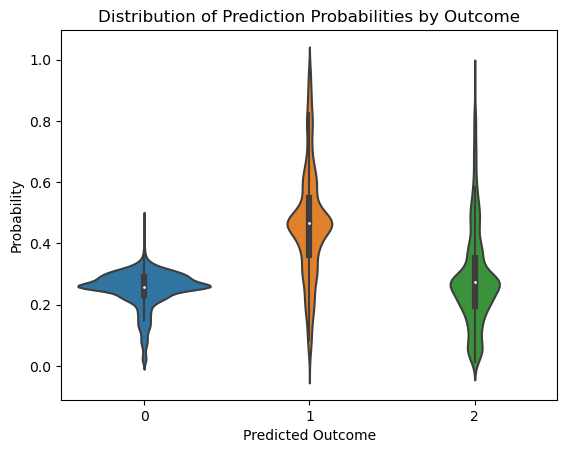

In [62]:
# Get prediction probabilities
y_probs = model.predict_proba(X_test)

# Convert to DataFrame
prob_df = pd.DataFrame(y_probs, columns=model.classes_)

# Melt DataFrame for visualization
prob_df_melted = prob_df.melt(var_name='Predicted Outcome', value_name='Probability')

# Plotting
sns.violinplot(x='Predicted Outcome', y='Probability', data=prob_df_melted)
plt.title('Distribution of Prediction Probabilities by Outcome')
plt.show()


# Prediction Probability Distribution Analysis

This violin plot shows the distribution of predicted probabilities for each type of match outcome:

- **Outcome 0 (Draw):** The distribution has a broad base with a lower median probability, indicating varied confidence in predicting draws and generally lower likelihood.
  
- **Outcome 1 (Home Win):** There is a sharp peak and narrow spread, with the median probability being the highest among the three outcomes, showing the model's strong confidence in predicting home wins.
  
- **Outcome 2 (Away Win):** The distribution has a broad spread with a median probability around 0.4, suggesting moderate confidence in predicting away wins.

## Key Takeaways:
- The model is most confident in predicting home wins, as reflected by the narrow distribution centered around a higher median probability.
- Predictions for draws are less confident, with a wider spread indicating greater uncertainty.
- Away win predictions also show variance, with a slightly higher confidence than draws but less than home wins.


### Cross Validation of the model 
This approach helps ensure that the model's performance is consistent across different subsets of the data.

For my classification task, I will  use k-fold cross-validation.


In [63]:
# Use cross_val_score to perform cross-validation. Here, you can specify the number of folds (e.g., 5 or 10).

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)

print("CV Scores for Each Fold:", cv_scores)
print("Average CV Score:", cv_scores.mean())




CV Scores for Each Fold: [0.51963048 0.52136259 0.50230947 0.51597383 0.51453321]
Average CV Score: 0.5147619142881064


### Summary of 5-Fold Cross-Validation Results

#### Cross-Validation Scores:
- The Gradient Boosting Classifier was evaluated using 5-fold cross-validation, yielding the following accuracy scores for each fold:
  - **1st Fold:** 51.96%
  - **2nd Fold:** 52.13%
  - **3rd Fold:** 50.30%
  - **4th Fold:** 51.59%
  - **5th Fold:** 51.47%

#### Average Performance:
- The **average accuracy across all folds** was approximately **51.49%**. 

#### Interpretation:
- **Consistent Performance:** The model exhibited a stable performance across different data subsets, as indicated by the consistent scores in each fold. This consistency suggests good model robustness.
- **Moderate Predictive Power:** The model achieved moderate accuracy levels, correctly predicting match outcomes slightly more than half of the time. While it demonstrates some predictive capability, there is a significant scope for improvement.
- **Model Generalizability:** The lack of substantial variation in accuracy across folds indicates that the model is not overfitting to specific segments of the data, which is positive for its general applicability.

#### Recommendations:
- **Enhance Features:** Reassess and potentially enhance the feature set for better predictive performance.
- **Optimize Hyperparameters:** Experiment with tuning the model's hyperparameters to optimize its accuracy.
- **Explore Alternative Models:** Testing different models might yield better accuracy and insights.
- **Advanced Techniques:** Consider employing more sophisticated machine learning approaches or ensemble methods if the current level of accuracy is insufficient.

These cross-validation results provide a realistic estimate of the model's effectiveness and serve as a foundation for further refinement and experimentation.


## General Conclusion of the Football Analytics Project

#### Project Overview:
- This project encompassed a comprehensive analysis in the realm of football analytics, covering three key areas: player ratings analysis (for both goalkeepers and outfield players), match outcome predictions (home win, away win, or draw), and the analysis of betting odds in relation to match outcomes.

#### Key Findings and Insights:
1. **Player Ratings Analysis:**
   - Utilized machine learning models, notably RandomForestRegressor and GradientBoosting, to predict player ratings based on various attributes.
   - Found significant correlations between specific player attributes and their overall ratings, highlighting different influential factors for outfield players and goalkeepers.

2. **Match Outcome Prediction:**
   - Developed predictive models to forecast match outcomes. The models showed moderate accuracy, with a notable proficiency in predicting home wins compared to away wins or draws.
   - The challenge in accurately predicting draws highlighted the complexity of such outcomes in football matches.

3. **Betting Odds Analysis:**
   - Investigated the relationship between betting odds and match outcomes. Models leveraging betting odds data provided insights into the predictive power and potential biases within the betting markets.

#### Overall Conclusions:
- The project demonstrated the applicability and effectiveness of machine learning techniques in various aspects of football analytics.
- Each analysis offered distinct insights: player rating predictions can aid in talent identification and player valuation; match outcome models can support strategic decision-making; and betting odds analysis can reveal market perceptions and potential opportunities.

#### Implications and Applications:
- Football clubs, sports analysts, and betting enthusiasts can leverage these insights for strategic planning, player assessment, and informed decision-making.
- The methodologies used in this project can be adapted and extended to other sports or areas within football, such as injury prediction or tactical analysis.

#### Recommendations for Future Work:
- Integrating additional data sources, like in-game statistics, player fitness data, or historical team performance, could further enhance the models' accuracy and depth of analysis.
- Exploring advanced analytics techniques and refining existing models could yield more nuanced insights and improved predictive capabilities.

### Final Thoughts:
- This project highlights the transformative impact of data science and machine learning in football analytics, providing valuable tools and insights for various stakeholders in the sports industry. It exemplifies how data-driven approaches can significantly contribute to understanding and enhancing the beautiful game.
